<img src="https://logodownload.org/wp-content/uploads/2017/09/mackenzie-logo.png" height="200" width="200" align="left">
<br><br><br>

CURSO: CIENCIA DE DADOS.<br>
COMPONENTE CURRICULAR:  PROJETO APLICADO II.<br>
SEMESTRE: 2023/2.<br>
PROFESSOR: ANDERSON ADAIME DE BORBA.<br><br>
ALUNOS: 
- LEONARDO DOS REIS OLHER - TIA: 22510249;
- THAINÁ VIEIRA DOS SANTOS - TIA: 22500081;
- VINICIUS CAUMO SEGATTO - TIA: 22506861;
- NICOLAS PINOTTI - TIA 22514112;
- VINÍCIUS VIEIRA DA CUNHA OLIVEIRA - TIA: 22505865.



## 1 IMPORTS

In [225]:
import pandas as pd
import numpy as np
from statistics import mode
from warnings import filterwarnings; filterwarnings('ignore') # retira avisos
import matplotlib.pyplot as plt
import seaborn as sns

## 2 READ CSV

In [226]:
df = pd.read_csv('ds_salaries.csv')
df.head(5)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


## 3 INFORMAÇÕES DADOS

### 3.1 DADOS QUE PRECISAM DE TRATAMENTO

In [227]:
# VALORES NULOS
print(df.isnull().sum(), end='\n\n')

# TIPO DADOS
print(df.dtypes, end='\n\n')

# TAMANHO DATA-FRAME
print(df.shape)

# DESCRIBE DATA-FRAME
display(df.describe())

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

(607, 12)


,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


### 3.2 VISUALIZAR DADOS

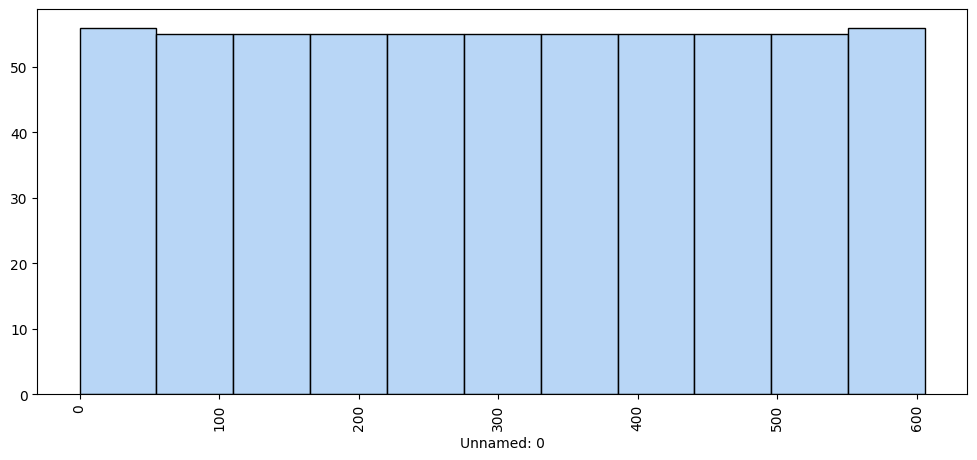

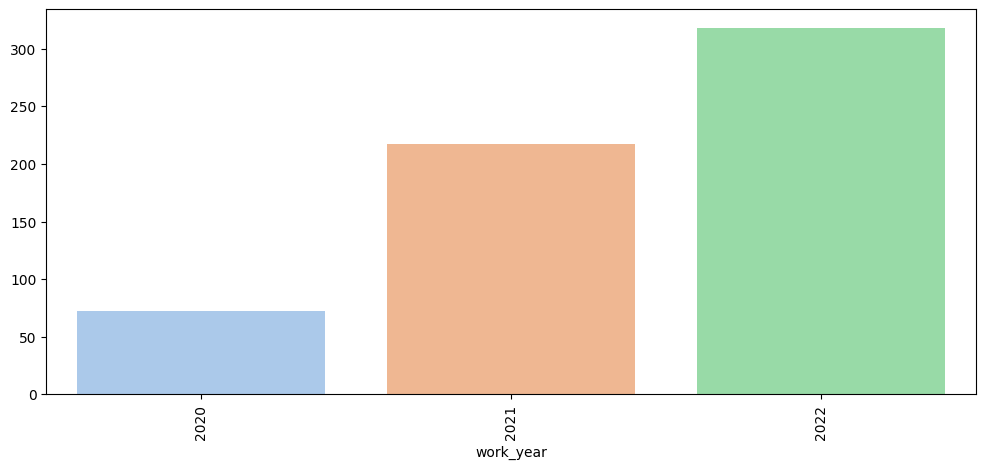

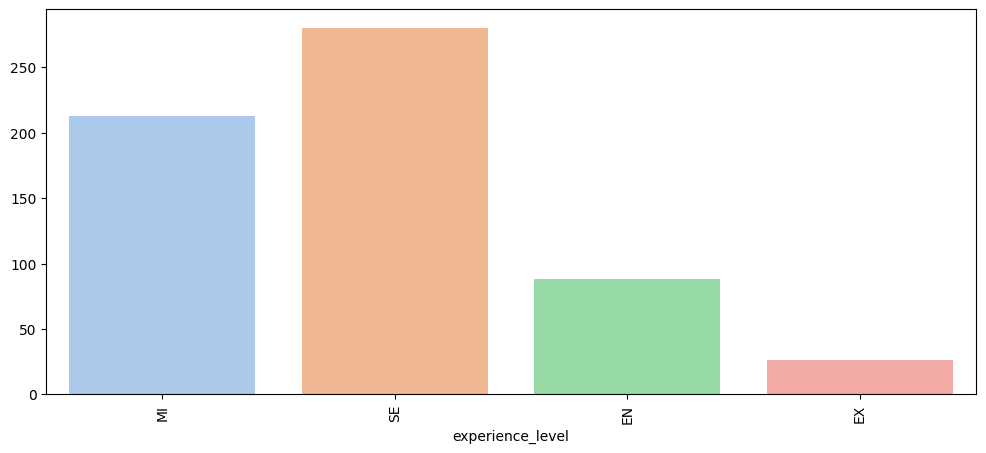

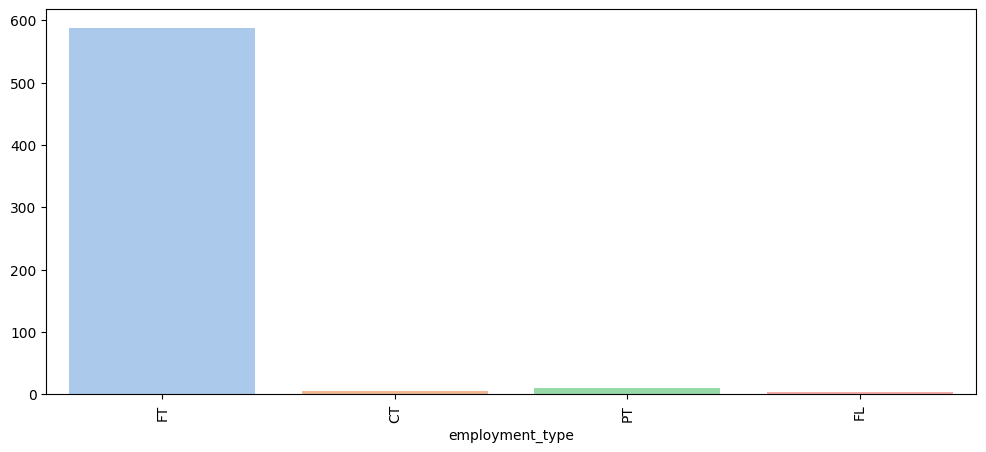

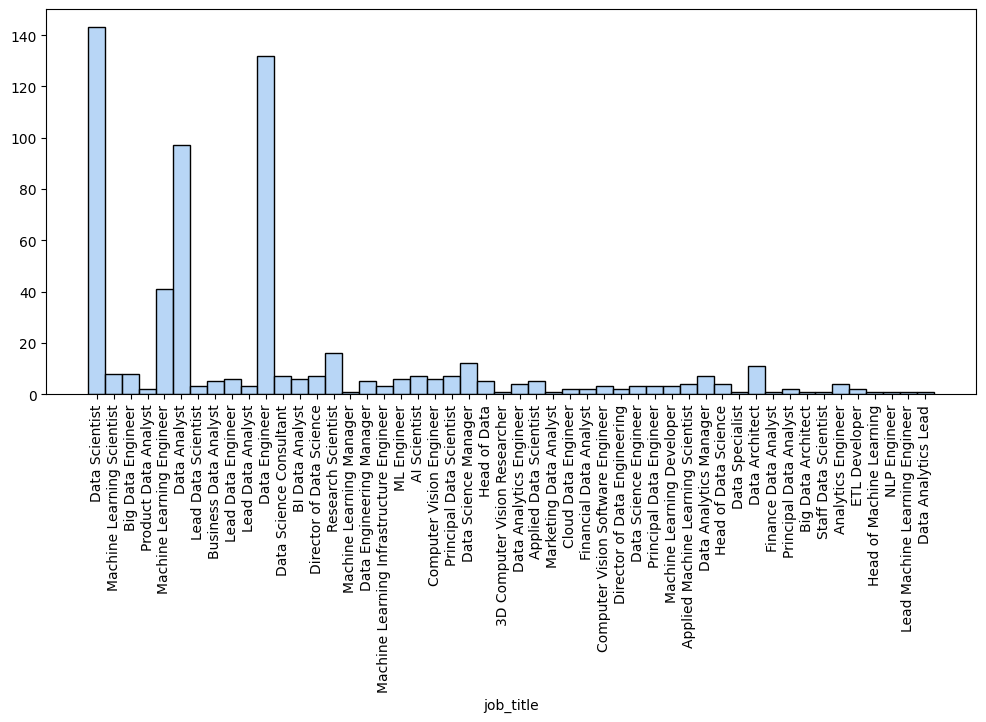

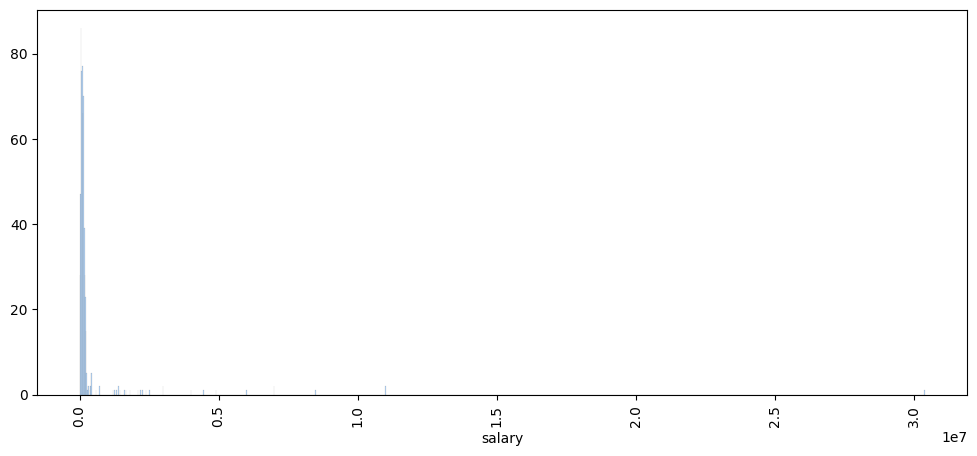

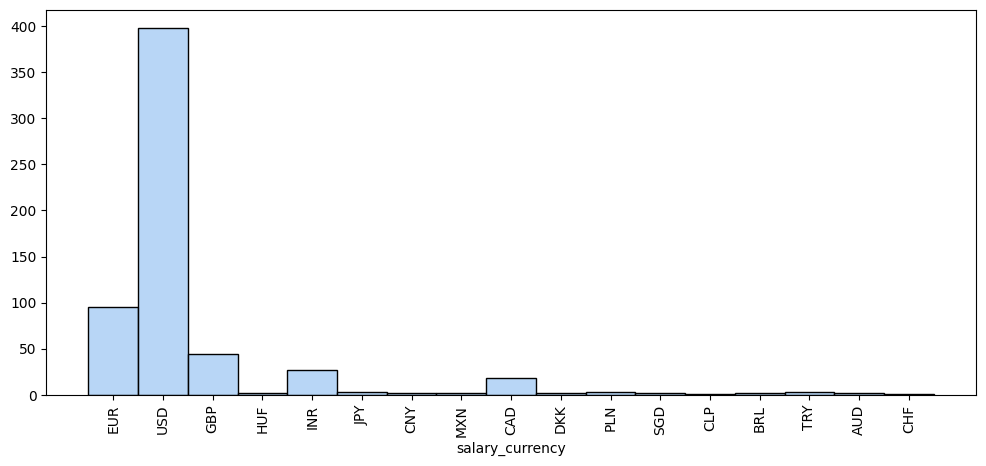

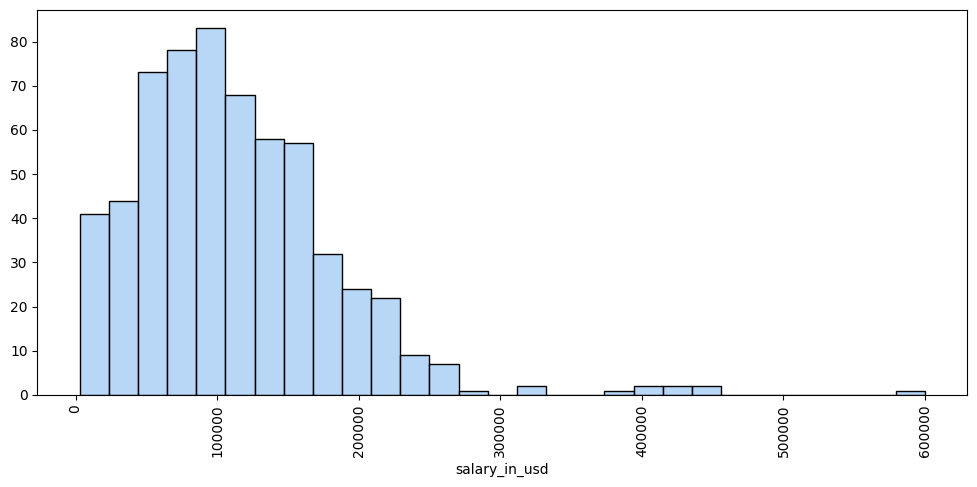

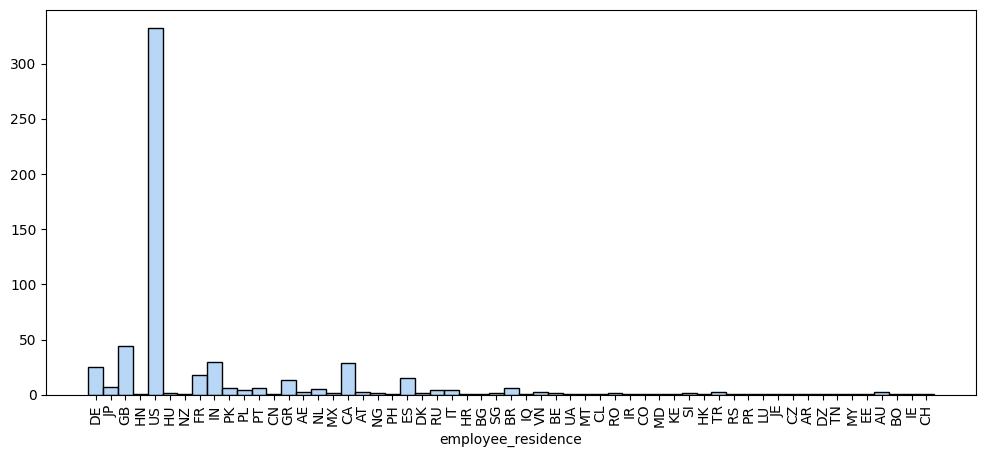

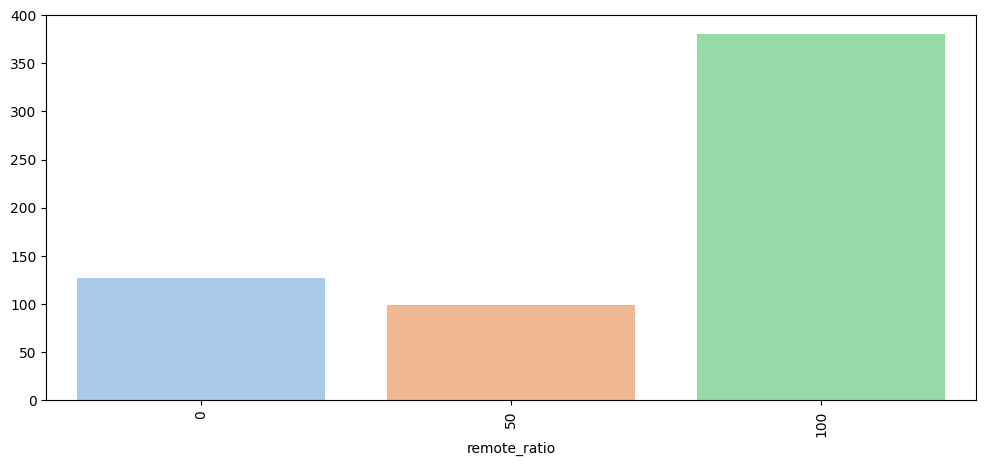

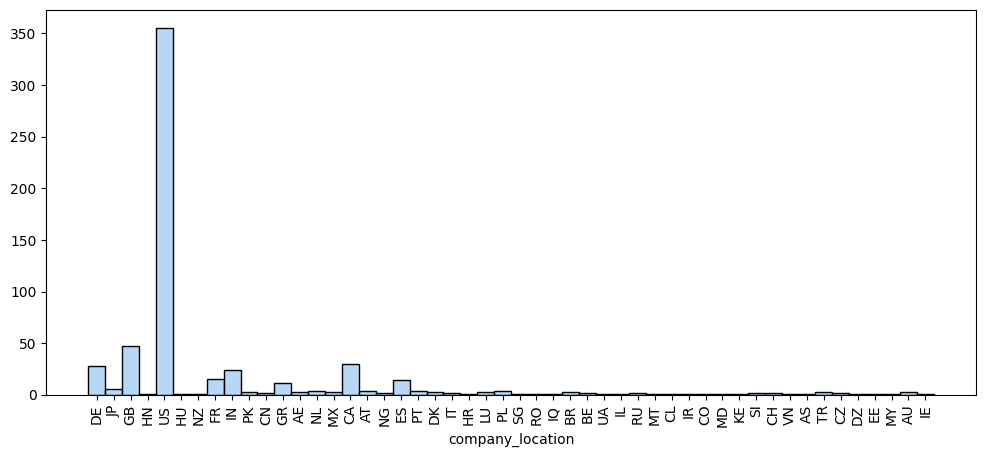

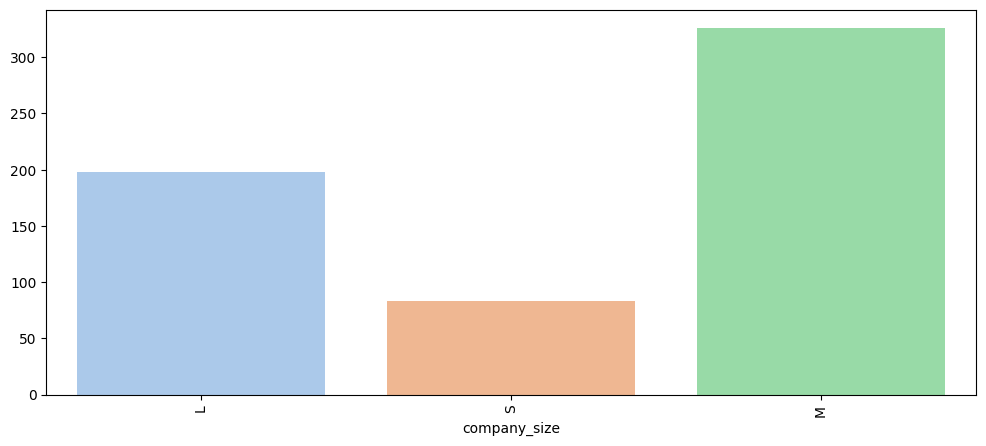

In [228]:
for col in df.columns.unique():
    if len(df[col].unique()) > 10:
        fig, ax = plt.subplots(figsize=(12,5))
        sns.histplot(x=df[col])   
    else:
        fig, ax = plt.subplots(figsize=(12,5))
        sns.countplot(x=df[col])
    plt.ylabel('')
    plt.xticks(rotation=90)
    plt.show()

## 4 DROP INFOS

### 4.1 REMOVER LINHAS
* Cargos diferentes de Analista de Dados.

In [229]:
df = df[df['job_title'].str.contains('data analyst', case=False)]

### 4.2 REMOVER COLUNAS
* ID;
* Salario com moeda Local;
* Nome moeda local;
* Titulo do Cargo de trabalho.

In [230]:
drops = ['Unnamed: 0', 'salary_currency', 'salary']
df.drop(drops, axis=1, inplace=True)

## 5 AJUSTE DE DADOS

### 5.1 RENOMEAR COLUNAS
* work_year: year.
* experience_level: experience.
* salary_in_usd: salary.
* employee_residence: residence.
* remote_ratio: remote.

In [231]:
df.rename(columns={'work_year':'year'
                  ,'experience_level':'experience'
                  ,'salary_in_usd':'salary'
                  ,'employee_residence':'residence'
                  ,'remote_ratio':'remote'
                  }, inplace= True)

### 5.2 TRABALHO REMOTO
* No Remote: Até 20% do trabalho é feito remoto.
* Partially: Até 80% do trabalho é feito remoto.
* Remote: Mais de 80% do trabalho é feito remoto.

In [232]:
df['remote'] = np\
    .where(df['remote'] < 20, 'No remote', np\
    .where(df['remote'] < 80, 'Partially', 'Remote'))

### 5.3 NIVEL EXPERIENCIA
* EN ➟ Entry
* MI ➟ Junior
* SE ➟ Intermediante
* EX ➟ Senior

In [233]:
df['experience'].replace({'EN':'1 - Entry'
                         ,'MI':'2 - Junior'
                         ,'SE':'3 - Intermediate'
                         ,'EX':'4 - Senior'}, inplace=True)

### 5.4 TIPO DE EMPREGO
* FT ➟ Full-Time
* CT ➟ Contratante
* FL ➟ Freelancer
* PT ➟ Meio_periodo

In [234]:
df['employment_type'] = np\
    .where(df['employment_type'] == 'FT', 'Full-Time', np\
    .where(df['employment_type'] == 'CT', 'Contratante', np\
    .where(df['employment_type'] == 'FL', 'Freelancer', np\
    .where(df['employment_type'] == 'PT', 'Meio_periodo', '-'))))

### 5.5 TAMANHO DA EMPRESA
* L ➟ Grande
* M ➟ Média
* S ➟ Pequena

In [235]:
df['company_size'] = np\
    .where(df['company_size'] == 'L', '3 - Grande', np\
    .where(df['company_size'] == 'M', '2 - Média', np\
    .where(df['company_size'] == 'S', '1 - Pequena', '-')))

### 5.6 IMIGRANTES

Residentes fora do pais em que a empresa esta localizada.

In [236]:
df['imigrante'] = df['company_location'] != df['residence']

## 6 ANALISE SALARIAL

### 6.1 GROUP BY

In [237]:
cols = ['year', 'experience', 'residence', 'remote', 'company_location', 'company_size', 'employment_type', 'imigrante']
groups = {}

for col in cols:
    groups[col] = df\
        .groupby(col, as_index=False)\
        .agg({'salary': 'mean'})


### 6.2 HISTOGRAMA

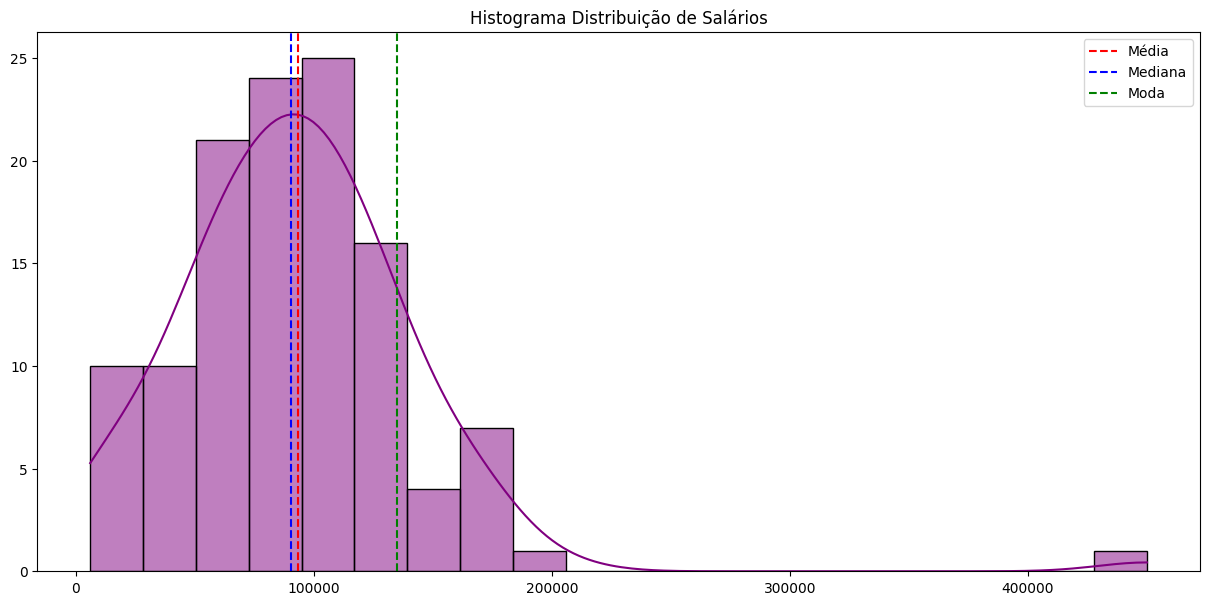

In [238]:
fig, _ = plt.subplots(figsize=(15,7))
sns.histplot(data=df, x='salary', kde=True, color='purple')
plt.axvline(df['salary'].mean(), color='red', linestyle='--', label='Média')
plt.axvline(df['salary'].median(), color='blue', linestyle='--', label='Mediana')
plt.axvline(mode(df['salary']), color='green', linestyle='--', label='Moda')
plt.xlabel('')
plt.ylabel('')
plt.title('Histograma Distribuição de Salários')
plt.legend()
plt.show()

### 6.3 ANALISE POR SALARIO

<p style="text-align: justify">
Durante o período de 2020 a 2022, uma análise detalhada dos salários no setor de Analista de Dados revelou uma tendência consistente de crescimento. Esse aumento sugere um aumento na valorização e demanda por profissionais qualificados nesse campo específico. </p>
    
<p style="text-align: justify"> O salário para Analistas de Dados apresentou um notável crescimento em 2021, registrando uma impressionante alta de quase 60% em relação a 2020 e pouco mais de 5% de diferença entre 2021 para 2022. </p>

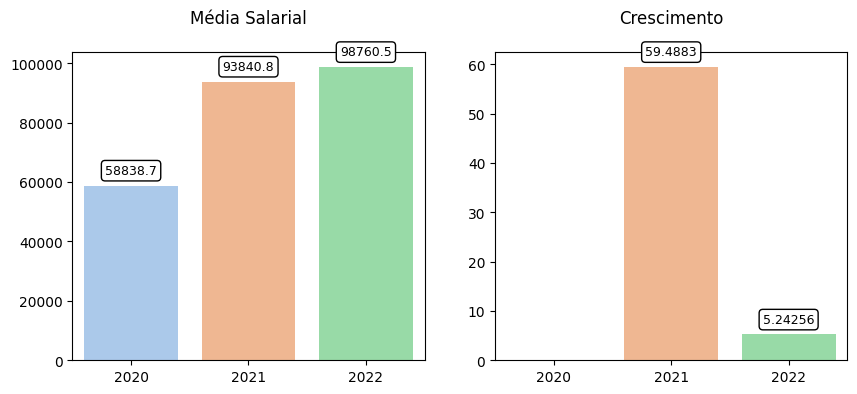

In [239]:
sns.set_palette("pastel") # CORES PADRÕES GRAFICOS

def values(grafico): # FUNÇÃO PLOTAR VALORES BAR PLOT
    for container in grafico.containers:
        grafico.bar_label(container, label_type="edge", color="black",
                     padding=6,
                     fontsize=9,
                     bbox={'boxstyle': 'round,pad=0.3', 'facecolor': 'white', 'edgecolor': 'black'})

        

# CRESCIMENTO POR ANO
groups['year']['crescimento'] = groups['year']['salary'].pct_change().mul(100)

fig, ax = plt.subplots(1, 2, figsize=(10,4))
g1 = sns.barplot(ax=ax[0], data=groups['year'], x='year', y='salary')
g2 = sns.barplot(ax=ax[1], data=groups['year'], x='year', y='crescimento')

values(g1)
values(g2)
    
ax[0].set_title('Média Salarial\n')
ax[1].set_title('Crescimento\n')
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[0].set_ylabel('')
ax[1].set_ylabel('')

plt.show()

### 6.4 ANALISE POR EXPERIÊNCIA

<p style="text-align: justify">
É notável a correlação direta entre o nível de senioridade e os salários dos analistas de dados. Conforme os profissionais ascendem na hierarquia de senioridade, observamos um crescimento consistente em seus ganhos.</p>
<p style="text-align: justify">
Um ponto de destaque é a notável diferença entre os níveis Junior e Intermediário de quase 45% de aumento na media salarial. A transição deste estágio inicial para um nível mais avançado na carreira de analista de dados representa um aumento significativo nos salários. Este salto é indicativo não apenas da aquisição de novas habilidades e competências, mas também da contribuição crescente dos profissionais para as atividades analíticas da organização.</p>

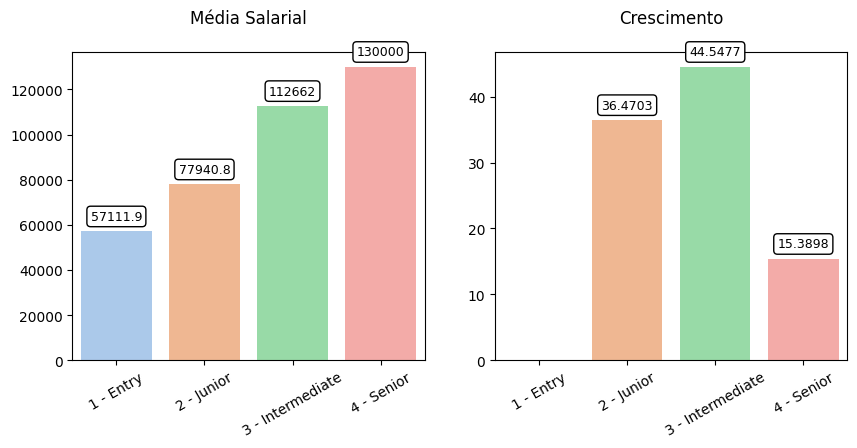

In [240]:
# CRESCIMENTO POR EXPERIÊNCIA
groups['experience']['crescimento'] = groups['experience']['salary'].pct_change().mul(100)

fig, ax = plt.subplots(1, 2, figsize=(10,4))
g1 = sns.barplot(ax=ax[0], data=groups['experience'], x='experience', y='salary')
g2 = sns.barplot(ax=ax[1], data=groups['experience'], x='experience', y='crescimento')

values(g1)
values(g2)

ax[0].set_title('Média Salarial\n')
ax[1].set_title('Crescimento\n')
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[0].set_ylabel('')
ax[1].set_ylabel('')

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=30)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=30)

plt.show()

### 6.5 ANALISE POR TIPO DA VAGA / TAMANHO DA EMPRESA / TIPO DE CONTRATO
<p style="text-align: justify">
Evidentemente as vagas de trabalho remotas apresentam, em média, um salario medio superior. No entanto, é importante ressaltar que essa diferença estatística pode ser atribuída, em parte, à presença de alguns casos de outliers.</p>

<p style="text-align: justify">
Empresas de médio porte tendem a oferecer, em média, salários mais elevados em comparação às de menor e de maior porte. No entanto, é importante notar que existem casos atípicos em empresas de grande porte, onde os salários podem exceder consideravelmente a média convencional. Esses casos representam uma exceção à tendência geral e demonstram que em organizações maiores, há potencial para remunerações significativamente mais elevadas.</p>
<p style="text-align: justify">
Temos uma quantidade limitada de informações sobre contratos de meio período e o tipo de contratante, o que pode potencialmente gerar algumas interpretações equivocadas. No entanto, mesmo com essa limitação, observa-se que os contratos de meio período apresentam uma remuneração significativamente inferior à média dos demais tipos de contrato. Em contrapartida, o tipo de contratante demonstra uma média ligeiramente superior em relação aos contratos em tempo integral.</p>

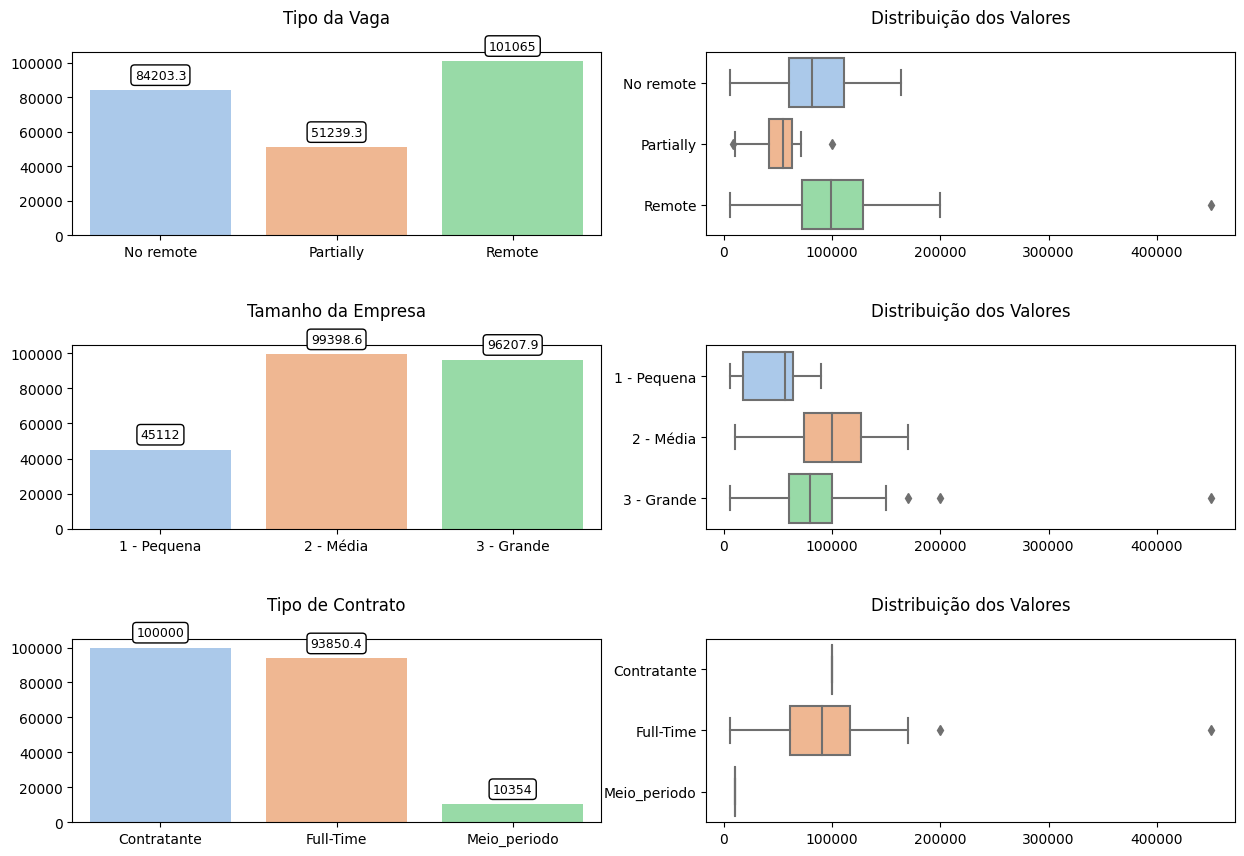

In [241]:
fig, ax = plt.subplots(3, 2, figsize=(15,10))

g1 = sns.barplot(ax=ax[0,0], data=groups['remote'].sort_values(by='remote'), x='remote', y='salary')
sns.boxplot(ax=ax[0,1], data=df.sort_values(by='remote'), x='salary', y='remote')
ax[0,0].set_title('Tipo da Vaga\n')
ax[0,1].set_title('Distribuição dos Valores\n')

g2 = sns.barplot(ax=ax[1,0], data=groups['company_size'].sort_values(by='company_size'), x='company_size', y='salary')
sns.boxplot(ax=ax[1,1], data=df.sort_values(by='company_size'), x='salary', y='company_size')
ax[1,0].set_title('Tamanho da Empresa\n')
ax[1,1].set_title('Distribuição dos Valores\n')

g3 = sns.barplot(ax=ax[2,0], data=groups['employment_type'].sort_values(by='employment_type'), x='employment_type', y='salary')
sns.boxplot(ax=ax[2,1], data=df.sort_values(by='employment_type'), x='salary', y='employment_type')
ax[2,0].set_title('Tipo de Contrato\n')
ax[2,1].set_title('Distribuição dos Valores\n')

values(g1)
values(g2)
values(g3)
    
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('')
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('')
ax[1,0].set_xlabel('')
ax[1,0].set_ylabel('')
ax[1,1].set_ylabel('')
ax[1,1].set_xlabel('')
ax[2,0].set_ylabel('')
ax[2,0].set_xlabel('')
ax[2,1].set_ylabel('')
ax[2,1].set_xlabel('')


plt.subplots_adjust(hspace=0.6)
plt.show()

### 6.6 ANALISE POR PAÍS
<p style="text-align: justify">
A análise realizada destaca que os Estados Unidos se destacam como o país com o maior numero de dados de profissionais atuando na área de Ciência de Dados. Além disso, apresenta-se como a nação com o mais elevado salário médio nesse campo, e é onde se concentra a população com os salários médios mais altos em comparação com outras partes do globo. No entanto, é importante notar que a análise também aponta a diferença entre os salários médios dos imigrantes (menor) e não-imigrantes (maior).
</p>

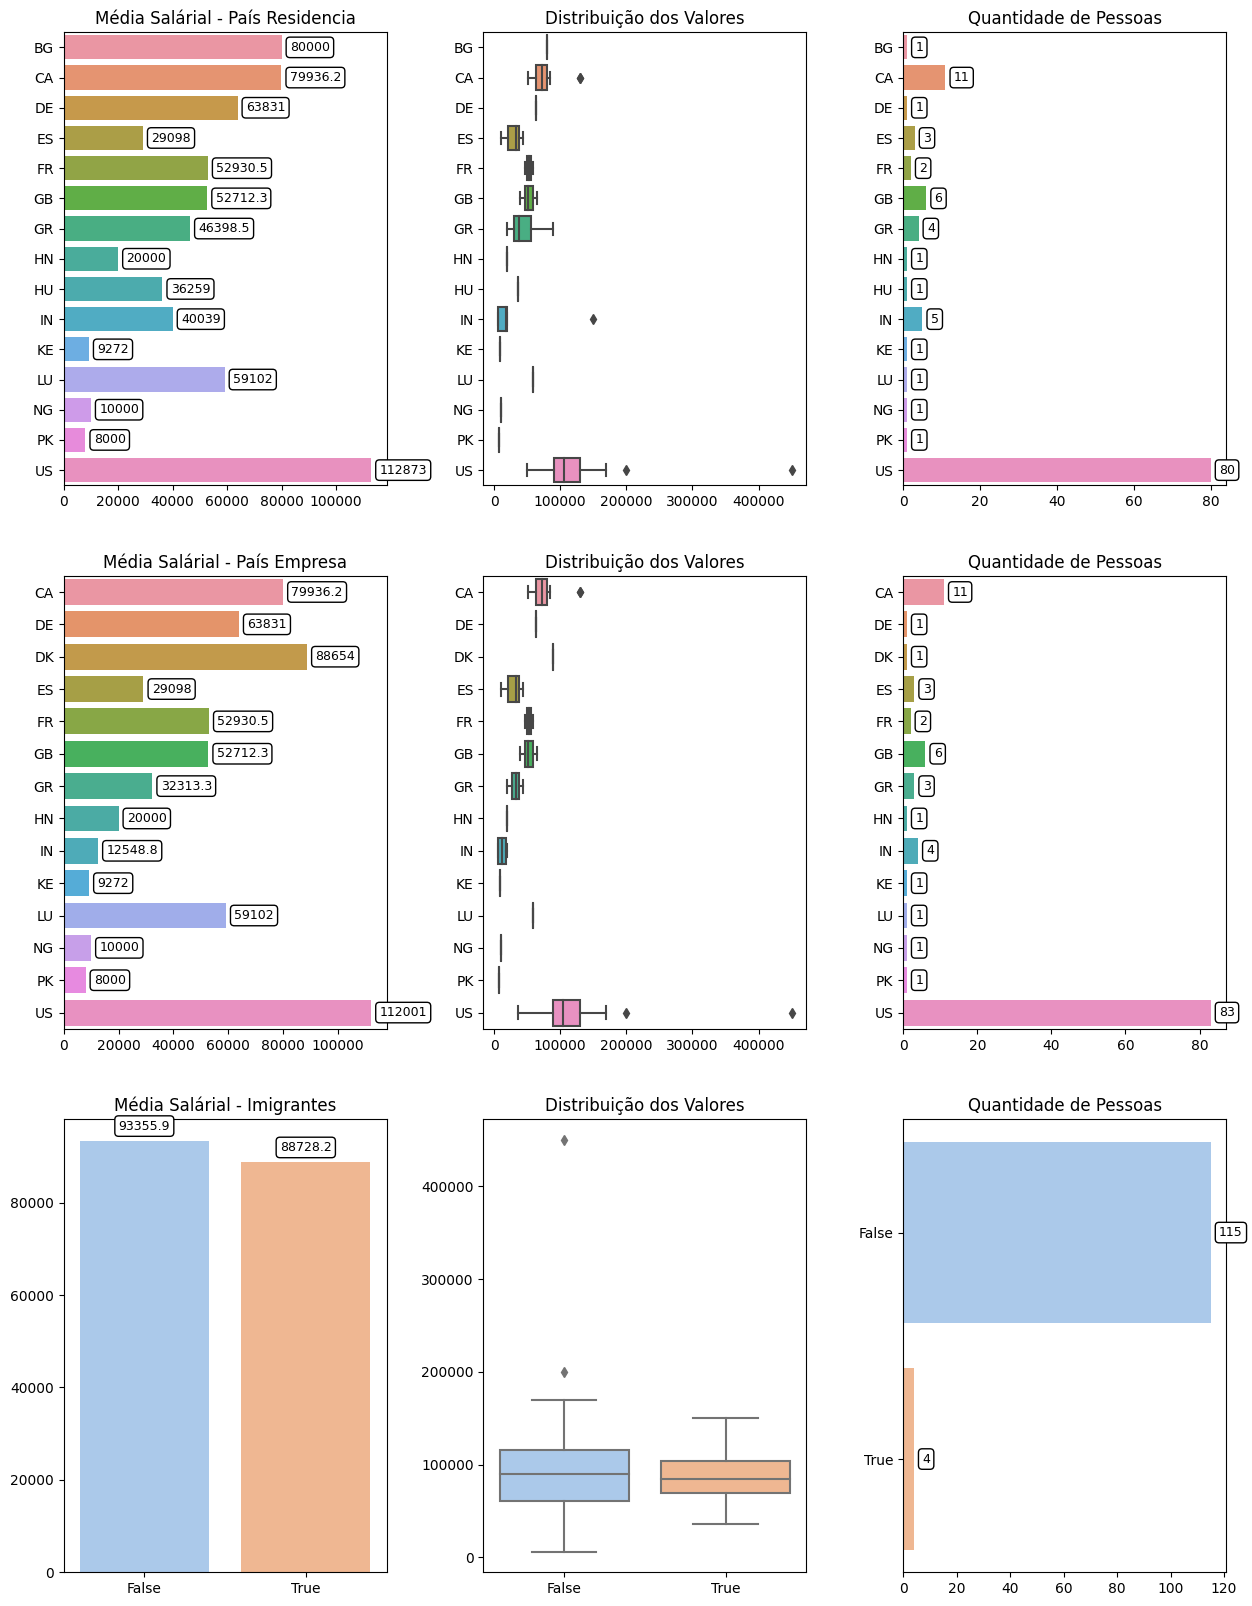

In [242]:
fig, ax = plt.subplots(3,3,figsize=(15,20))
g1 = sns.barplot(ax=ax[0,0], data=groups['residence'].sort_values(by='residence'), x='salary', y='residence')
sns.boxplot(ax=ax[0,1], data=df.sort_values(by='residence'), x='salary', y='residence')
g2 = sns.countplot(ax=ax[0,2], data=df.sort_values(by='residence'), y='residence')
ax[0,0].set_title('Média Salárial - País Residencia')
ax[0,1].set_title('Distribuição dos Valores')
ax[0,2].set_title('Quantidade de Pessoas')

g3 = sns.barplot(ax=ax[1,0], data=groups['company_location'].sort_values(by='company_location'), x='salary', y='company_location')
sns.boxplot(ax=ax[1,1], data=df.sort_values(by='company_location'), x='salary', y='company_location')
g4 = sns.countplot(ax=ax[1,2], data=df.sort_values(by='company_location'), y='company_location')
ax[1,0].set_title('Média Salárial - País Empresa')
ax[1,1].set_title('Distribuição dos Valores')
ax[1,2].set_title('Quantidade de Pessoas')

g5 = sns.barplot(ax=ax[2,0], data=groups['imigrante'].sort_values(by='imigrante'), x='imigrante', y='salary')
sns.boxplot(ax=ax[2,1], data=df.sort_values(by='imigrante'), x='imigrante', y='salary')
g6 = sns.countplot(ax=ax[2,2], data=df.sort_values(by='imigrante'), y='imigrante')
ax[2,0].set_title('Média Salárial - Imigrantes')
ax[2,1].set_title('Distribuição dos Valores')
ax[2,2].set_title('Quantidade de Pessoas')

values(g1)
values(g2)
values(g3)
values(g4)
values(g5)
values(g6)

plt.subplots_adjust(wspace=0.3)

ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('')
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('')
ax[0,2].set_xlabel('')
ax[0,2].set_ylabel('')
ax[1,0].set_xlabel('')
ax[1,0].set_ylabel('')
ax[1,1].set_ylabel('')
ax[1,1].set_xlabel('')
ax[1,2].set_ylabel('')
ax[1,2].set_xlabel('')
ax[2,0].set_xlabel('')
ax[2,0].set_ylabel('')
ax[2,1].set_ylabel('')
ax[2,1].set_xlabel('')
ax[2,2].set_ylabel('')
ax[2,2].set_xlabel('')

plt.show()

### 6.7 ANALISE QUANTIDADE DE PESSOAS

<p style="text-align: justify">
Ao analisarmos o gráfico que apresenta a distribuição dos tipos de contrato em um conjunto de dados, podemos observar que o tipo de contrato "full-time" é o que possui a maior representatividade, com uma quantidade significativamente maior de dados em relação aos tipos "contratante" e "meio período". Por outro lado, os tipos "contratante" e "meio período" têm uma presença bem mais reduzida nos dados.
    
Essa discrepância na quantidade de dados entre as classes pode causar desbalanceamento, o que pode levar o modelo a ter dificuldades em aprender corretamente as características das classes minoritárias. Portanto iremos remover esses dados no algoritmo para evitar um treinado com o conjunto de dados desbalanceado.
</p>

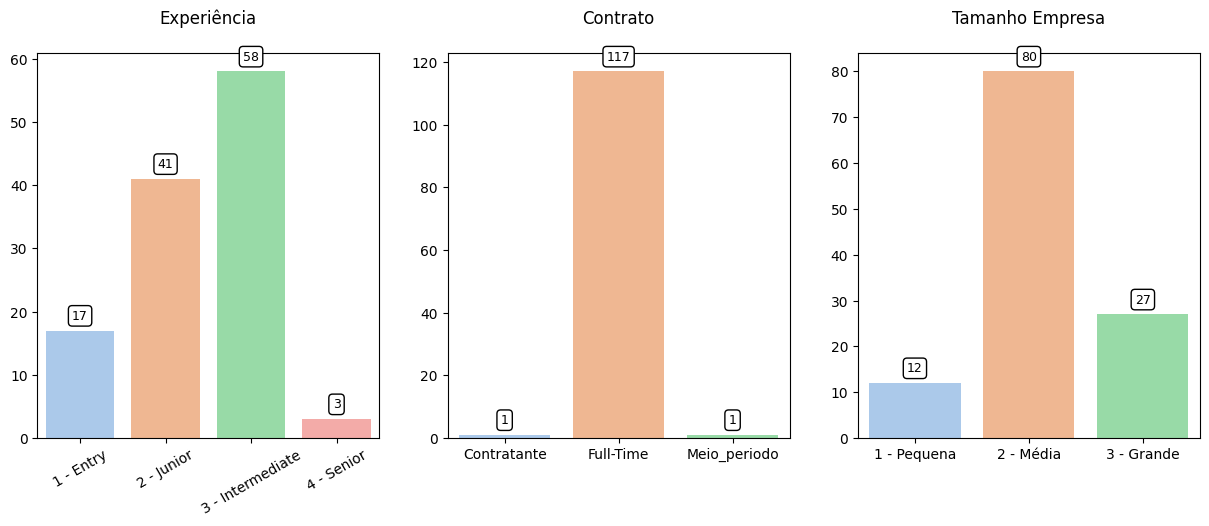

In [243]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

g1 = sns.countplot(ax=ax[0], data=df.sort_values(by='experience'), x='experience')
g2 = sns.countplot(ax=ax[1], data=df.sort_values(by='employment_type'), x='employment_type')
g3 = sns.countplot(ax=ax[2], data=df.sort_values(by='company_size'), x='company_size')

ax[0].set_title('Experiência\n')
ax[1].set_title('Contrato\n')
ax[2].set_title('Tamanho Empresa\n')

values(g1)
values(g2)
values(g3)

ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[2].set_xlabel('')
ax[2].set_ylabel('')

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=30)

plt.show()

### 6.8 ANALISE PAISES

<p style="text-align: justify">
A análise do gráfico revela uma disparidade significativa entre os Estados Unidos e os demais países em relação às vagas para cientistas de dados, especialmente no que diz respeito aos cargos do tipo sênior.

Primeiramente, observamos que a maioria das vagas para cientistas de dados está concentrada nos Estados Unidos. Isso pode indicar uma maior demanda por profissionais dessa área nesse país em comparação com outras nações analisadas.
</p>

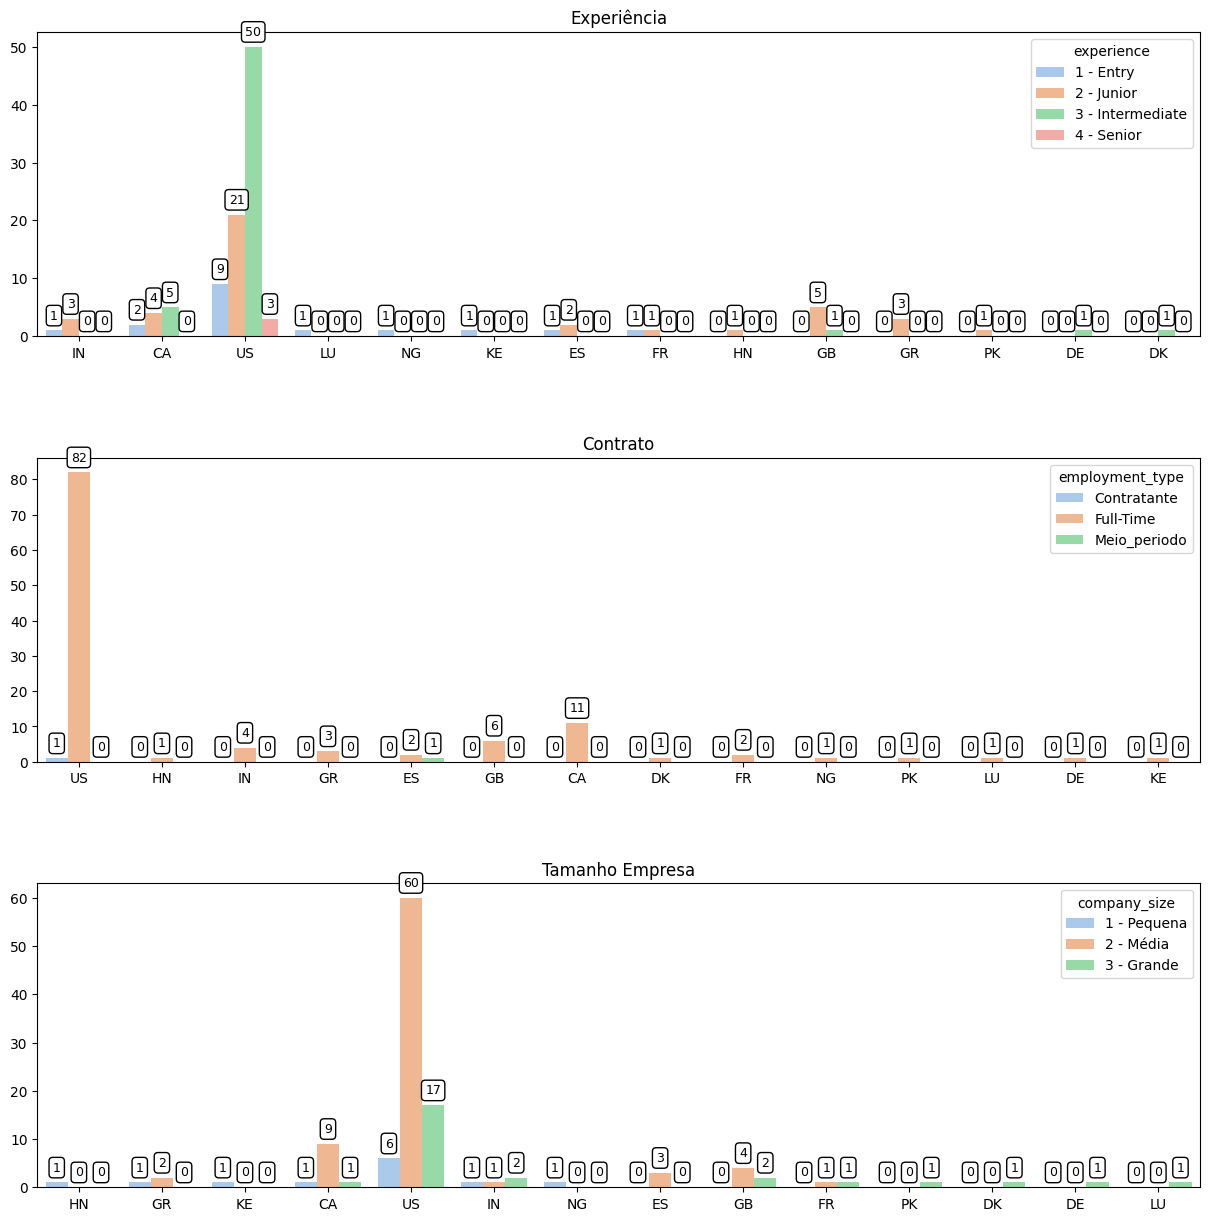

In [244]:
fig, ax = plt.subplots(3,1,figsize=(15,15))
g1 = sns.countplot(ax=ax[0], data=df.sort_values(by='experience'), x='company_location', hue='experience')
g2 = sns.countplot(ax=ax[1], data=df.sort_values(by='employment_type'), x='company_location', hue='employment_type')
g3 = sns.countplot(ax=ax[2], data=df.sort_values(by='company_size'), x='company_location', hue='company_size')

ax[0].set_title('Experiência')
ax[1].set_title('Contrato')
ax[2].set_title('Tamanho Empresa')

values(g1)
values(g2)
values(g3)

ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[2].set_xlabel('')
ax[2].set_ylabel('')

plt.subplots_adjust(hspace=0.4)

plt.show()

## 7 CORRELAÇÃO E SIGNIFICÂNCIA

### 7.1 DISPERSÃO E REGRESSÃO LINEAR

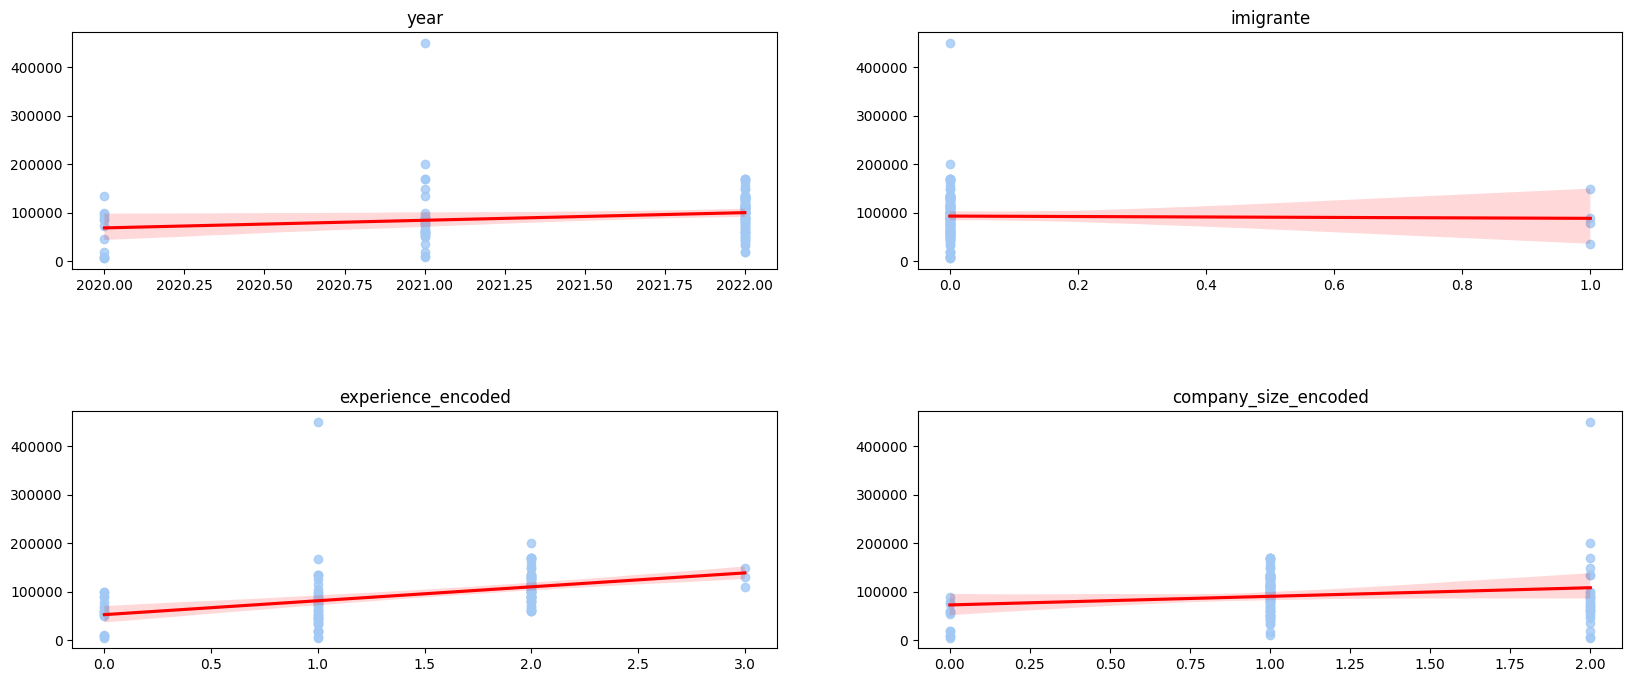

In [245]:
from sklearn.preprocessing import LabelEncoder

df['experience_encoded'] = LabelEncoder().fit_transform(X=df['experience'])
df['company_size_encoded'] = LabelEncoder().fit_transform(X=df['company_size'])

cols = ['year', 'imigrante', 'experience_encoded', 'company_size_encoded']

fig, ax = plt.subplots(2,2, figsize=(20,8))
n = 0
for i, col in enumerate(cols):
    if i % 2 == 0:
        sns.regplot(ax=ax[n,0], data=df, x=col, y='salary', line_kws={'color':'red'})
        sns.regplot(ax=ax[n,1], data=df, x=cols[i+1], y='salary', line_kws={'color':'red'})
        ax[n,0].set_title(col)
        ax[n,0].set_xlabel('')
        ax[n,0].set_ylabel('')
        ax[n,1].set_title(cols[i+1])
        ax[n,1].set_xlabel('')
        ax[n,1].set_ylabel('')
        n += 1
        
plt.subplots_adjust(hspace=0.6)
plt.show()

### 7.2 CORRELAÇÃO DE PEARSON

YEAR                 | STATISTICS   0.2024 | PVALUE       0.0273 | SIGNIFICATIVA       
IMIGRANTE            | STATISTICS  -0.0157 | PVALUE       0.8655 | NÃO SIGNIFICATIVA   
EXPERIENCE_ENCODED   | STATISTICS   0.4092 | PVALUE       0.0000 | SIGNIFICATIVA       
COMPANY_SIZE_ENCODED | STATISTICS   0.1863 | PVALUE       0.0424 | SIGNIFICATIVA       


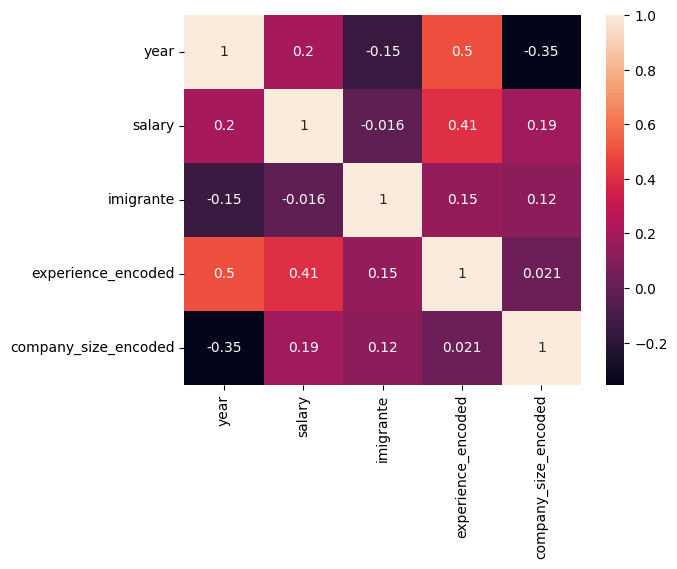

In [246]:
from scipy.stats import pearsonr, spearmanr, kendalltau

for col in cols:
    dados = pearsonr(df['salary'], df[col])
    
    if dados[1] > .05:
        status = 'NÃO SIGNIFICATIVA'
    else:
        status = 'SIGNIFICATIVA'
    print(f'{col.upper():<20} | STATISTICS {dados[0]:>8.4f} | PVALUE {dados[1]:>12.4f} | {status:<20}')
    
sns.heatmap(df.corr(method='pearson'), annot=True);

### 7.3 CORRELAÇÃO DE SPEARMAN

YEAR                 | STATISTICS   0.2945 | PVALUE       0.0011 | SIGNIFICATIVA       
IMIGRANTE            | STATISTICS  -0.0244 | PVALUE       0.7919 | NÃO SIGNIFICATIVA   
EXPERIENCE_ENCODED   | STATISTICS   0.5751 | PVALUE       0.0000 | SIGNIFICATIVA       
COMPANY_SIZE_ENCODED | STATISTICS   0.1013 | PVALUE       0.2729 | NÃO SIGNIFICATIVA   


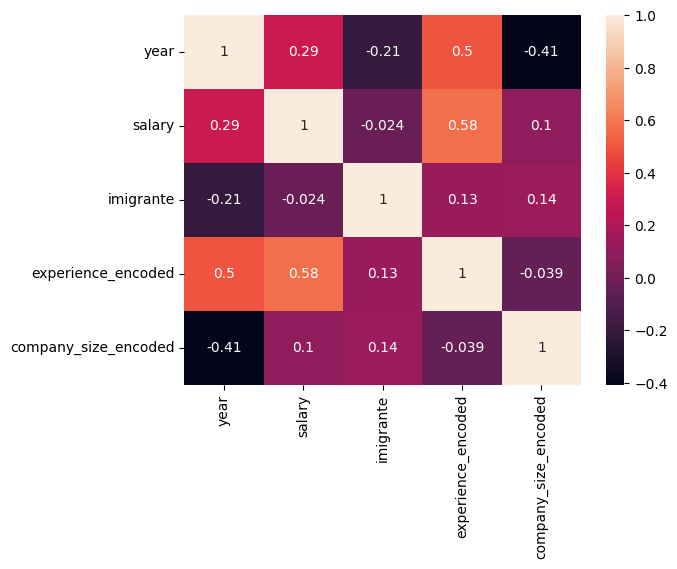

In [247]:
for col in cols:
    dados = spearmanr(df['salary'], df[col])
    
    if dados[1] > .05:
        status = 'NÃO SIGNIFICATIVA'
    else:
        status = 'SIGNIFICATIVA'
    print(f'{col.upper():<20} | STATISTICS {dados[0]:>8.4f} | PVALUE {dados[1]:>12.4f} | {status:<20}')


sns.heatmap(df.corr(method='spearman'), annot=True);

### 7.4 CORRELAÇÃO DE KENDALL

YEAR                 | STATISTICS   0.2338 | PVALUE       0.0014 | SIGNIFICATIVA       
IMIGRANTE            | STATISTICS  -0.0201 | PVALUE       0.7907 | NÃO SIGNIFICATIVA   
EXPERIENCE_ENCODED   | STATISTICS   0.4462 | PVALUE       0.0000 | SIGNIFICATIVA       
COMPANY_SIZE_ENCODED | STATISTICS   0.0810 | PVALUE       0.2703 | NÃO SIGNIFICATIVA   


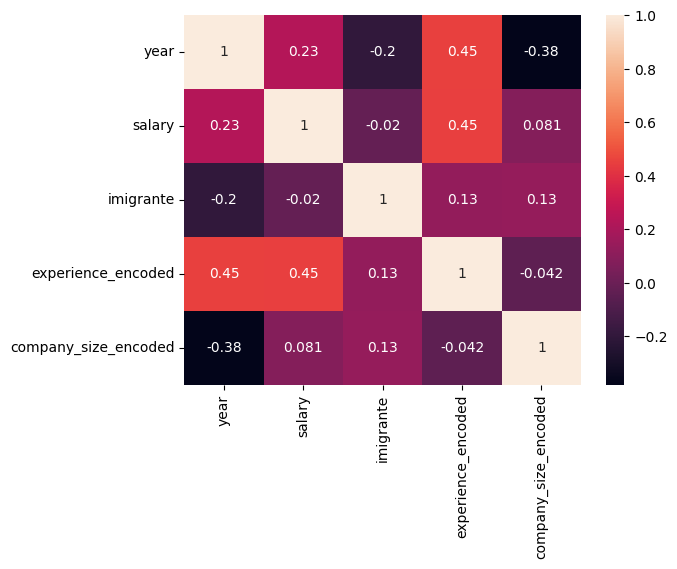

In [248]:
for col in cols:
    dados = kendalltau(df['salary'], df[col])
    
    if dados[1] > .05:
        status = 'NÃO SIGNIFICATIVA'
    else:
        status = 'SIGNIFICATIVA'
    print(f'{col.upper():<20} | STATISTICS {dados[0]:>8.4f} | PVALUE {dados[1]:>12.4f} | {status:<20}')

    
sns.heatmap(df.corr(method='kendall'), annot=True);

df.drop(['experience_encoded','company_size_encoded'], axis=1, inplace=True)

## 8 RANDOM FOREST

### 8.1 LIMPEZA DE DADOS

In [249]:
# PREVER APENAS TIPO DE TRABALHO FULL-TIME
df = df[df['employment_type'] == 'Full-Time']

# RETIRAR COLUNAS QUE NÃO SERAM USADOS NO MODELO
df.drop(['imigrante','employment_type','residence','company_size'], axis=1, inplace=True)

# CONTINENTE DA EMPRESA
df['company_location']\
    .replace({'HN': 'América Central'
             ,'US': 'América do Norte'
             ,'PK': 'Ásia'
             ,'IN': 'Ásia'
             ,'FR': 'Europa'
             ,'NG': 'África'
             ,'DK': 'Europa'
             ,'GB': 'Europa'
             ,'KE': 'África'
             ,'CA': 'América do Norte'
             ,'DE': 'Europa'
             ,'LU': 'Europa'
             ,'ES': 'Europa'
             ,'GR': 'Europa'
    }, inplace=True)

### 8.2 REMOÇÃO DE OUTLIERS

* Limite Inferior;
* Limite Superior.

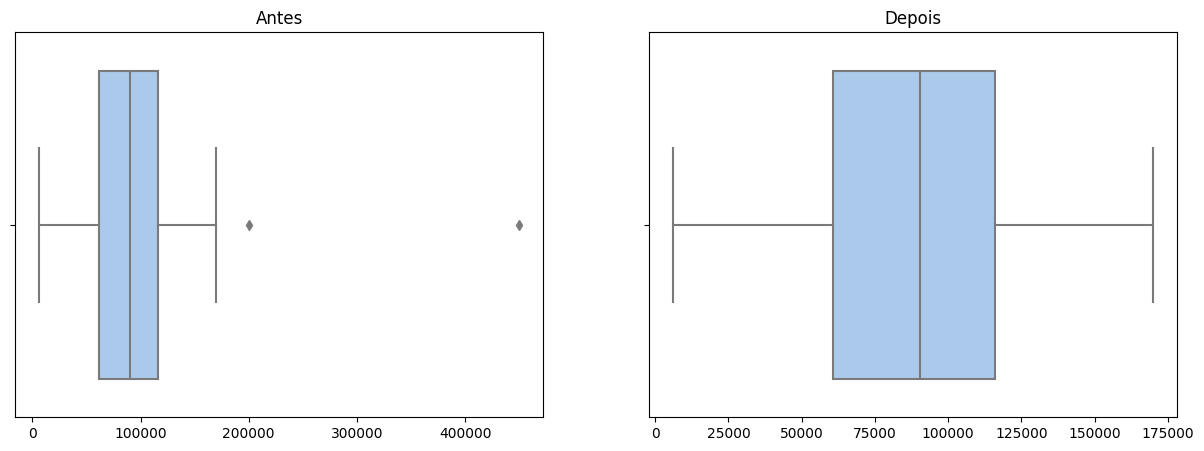

In [250]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.boxplot(ax=ax[0], data=df, x='salary')

q1 = df['salary'].quantile(.25)
q3 = df['salary'].quantile(.75)
iqr = q3-q1
limite_inf = q1 - (1.5 * iqr)
limite_sup = q3 + (1.5 * iqr)

df = df[(df['salary'] >= limite_inf) & (df['salary'] <= limite_sup)]

sns.boxplot(ax=ax[1], data=df, x='salary')

ax[0].set_title('Antes')
ax[1].set_title('Depois')
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[0].set_ylabel('')
ax[1].set_ylabel('')

plt.show()

### 8.3 CODIFICAÇÃO
* Label Encoder;
* One Hot Encoder.

In [251]:
from sklearn.preprocessing import LabelEncoder

# Label Encoders
df['experience'] = LabelEncoder().fit_transform(df['experience'])
df['year'] = LabelEncoder().fit_transform(df['year'])

# One Hot Encoders
df = pd\
    .concat([df, pd.get_dummies(df['company_location']), pd.get_dummies(df['job_title']), pd.get_dummies(df['remote'])], axis=1)\
    .drop(['company_location','job_title','remote'], axis=1)

df.head(5)

,year,experience,salary,América Central,América do Norte,Europa,África,Ásia,BI Data Analyst,Business Data Analyst,Data Analyst,Finance Data Analyst,Financial Data Analyst,Lead Data Analyst,Marketing Data Analyst,Principal Data Analyst,Product Data Analyst,No remote,Partially,Remote
3,0,1,20000,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
5,0,0,72000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
8,0,1,135000,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
13,0,1,87000,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
14,0,1,85000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


### 8.4 PRÉ-PROCESSAMENTO
* Standard Scaler;
* MinMaxScaler;
* Normalizer.

In [252]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

y = df['salary'].values
x = df.drop('salary', axis=1).values

datas = {'X': x
        ,'StandardScaler': StandardScaler().fit_transform(X=x)
        ,'MinMaxScaler': MinMaxScaler().fit_transform(X=x)
        ,'Normalizer': Normalizer().fit_transform(X=x)}

### 8.5 REDUÇÃO DE DIMENSIONALIDADE 
* PCA;
* Kernel PCA;
* LDA.

In [253]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

um_terco = round(df.shape[1]/3)
meio = round(df.shape[1]/2)

# PCA
datas['X_PCA_1/3'] = PCA(n_components=um_terco, svd_solver='auto').fit_transform(datas['X'])
datas['StandardScaler_PCA_1/3'] = PCA(n_components=um_terco, svd_solver='auto').fit_transform(datas['StandardScaler'])
datas['MinMaxScaler_PCA_1/3'] = PCA(n_components=um_terco, svd_solver='auto').fit_transform(datas['MinMaxScaler'])
datas['Normalizer_PCA_1/3'] = PCA(n_components=um_terco, svd_solver='auto').fit_transform(datas['Normalizer'])
datas['X_PCA_1/2'] = PCA(n_components=meio, svd_solver='auto').fit_transform(datas['X'])
datas['StandardScaler_PCA_1/2'] = PCA(n_components=meio, svd_solver='auto').fit_transform(datas['StandardScaler'])
datas['MinMaxScaler_PCA_1/2'] = PCA(n_components=meio, svd_solver='auto').fit_transform(datas['MinMaxScaler'])
datas['Normalizer_PCA_1/2'] = PCA(n_components=meio, svd_solver='auto').fit_transform(datas['Normalizer'])

# KernelPCA
datas['X_KernelPCA_1/3'] = KernelPCA(n_components=um_terco).fit_transform(datas['X'])
datas['StandardScaler_KernelPCA_1/3'] = KernelPCA(n_components=um_terco).fit_transform(datas['StandardScaler'])
datas['MinMaxScaler_KernelPCA_1/3'] = KernelPCA(n_components=um_terco).fit_transform(datas['MinMaxScaler'])
datas['Normalizer_KernelPCA_1/3'] = KernelPCA(n_components=um_terco).fit_transform(datas['Normalizer'])
datas['X_KernelPCA_1/2'] = KernelPCA(n_components=meio).fit_transform(datas['X'])
datas['StandardScaler_KernelPCA_1/2'] = KernelPCA(n_components=meio).fit_transform(datas['StandardScaler'])
datas['MinMaxScaler_KernelPCA_1/2'] = KernelPCA(n_components=meio).fit_transform(datas['MinMaxScaler'])
datas['Normalizer_KernelPCA_1/2'] = KernelPCA(n_components=meio).fit_transform(datas['Normalizer'])

# LDA
datas['X_LDA_1/3'] = LinearDiscriminantAnalysis(n_components=um_terco).fit_transform(datas['X'], y)
datas['StandardScaler_LDA_1/3'] = LinearDiscriminantAnalysis(n_components=um_terco).fit_transform(datas['StandardScaler'], y)
datas['MinMaxScaler_LDA_1/3'] = LinearDiscriminantAnalysis(n_components=um_terco).fit_transform(datas['MinMaxScaler'], y)
datas['Normalizer_LDA_1/3'] = LinearDiscriminantAnalysis(n_components=um_terco).fit_transform(datas['Normalizer'], y)
datas['X_LDA_1/2'] = LinearDiscriminantAnalysis(n_components=meio).fit_transform(datas['X'], y)
datas['StandardScaler_LDA_1/2'] = LinearDiscriminantAnalysis(n_components=meio).fit_transform(datas['StandardScaler'], y)
datas['MinMaxScaler_LDA_1/2'] = LinearDiscriminantAnalysis(n_components=meio).fit_transform(datas['MinMaxScaler'], y)
datas['Normalizer_LDA_1/2'] = LinearDiscriminantAnalysis(n_components=meio).fit_transform(datas['Normalizer'], y)

### 8.6 CLUSTERIZAÇÃO

In [254]:
from sklearn.cluster import KMeans

for name, data in datas.items():
    # NOVAS FEATURES KNN PARA MODELO
    clusters = KMeans(n_clusters=25, random_state=0).fit_predict(data)
    datas[name] = np.column_stack((data, clusters))    

### 8.7 ALGORITMOS BASEADO EM ARVORE DE DECISÃO (REGRESSÃO)
* Decision Tree;
* Random Forest;
* Bagging;
* ExtraTrees;
* AdaBoost;
* XGBoost.

In [255]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

models = {
         # << TREE >>
          'tree_a01' : DecisionTreeRegressor(criterion='squared_error')
         ,'tree_a02' : DecisionTreeRegressor(criterion='friedman_mse')
         ,'tree_a03' : DecisionTreeRegressor(criterion='absolute_error')
         ,'tree_a04' : DecisionTreeRegressor(criterion='poisson')
         ,'tree_b01' : DecisionTreeRegressor(splitter='best')
         ,'tree_b02' : DecisionTreeRegressor(splitter='random')
         ,'tree_c01' : DecisionTreeRegressor(max_depth=50)
         ,'tree_c02' : DecisionTreeRegressor(max_depth=100)
         ,'tree_c03' : DecisionTreeRegressor(max_depth=200)
         ,'tree_c04' : DecisionTreeRegressor(max_depth=300)
         ,'tree_c05' : DecisionTreeRegressor(max_depth=400)
         # << RANDOM FOREST >>
         ,'random_a01' : RandomForestRegressor(n_estimators=50)
         ,'random_a02' : RandomForestRegressor(n_estimators=100)
         ,'random_a03' : RandomForestRegressor(n_estimators=200)
         ,'random_a04' : RandomForestRegressor(n_estimators=300)
         ,'random_a05' : RandomForestRegressor(n_estimators=400)
         ,'random_b01' : RandomForestRegressor(criterion='squared_error')
         ,'random_b02' : RandomForestRegressor(criterion='absolute_error')
         ,'random_b03' : RandomForestRegressor(criterion='friedman_mse')
         ,'random_b04' : RandomForestRegressor(criterion='poisson')
         ,'random_c01' : RandomForestRegressor(max_depth=50)
         ,'random_c02' : RandomForestRegressor(max_depth=100)
         ,'random_c03' : RandomForestRegressor(max_depth=200)
         ,'random_c04' : RandomForestRegressor(max_depth=300)
         ,'random_c05' : RandomForestRegressor(max_depth=400)
         ,'random_d01' : RandomForestRegressor(max_features='sqrt')
         ,'random_d02' : RandomForestRegressor(max_features='log2')
         ,'random_d03' : RandomForestRegressor(max_features=None)
         # << BAGGIN >>
         ,'bagging_a01': BaggingRegressor(n_estimators=3)
         ,'bagging_a02': BaggingRegressor(n_estimators=5)
         ,'bagging_a03': BaggingRegressor(n_estimators=10)
         ,'bagging_a04': BaggingRegressor(n_estimators=20)
         ,'bagging_b01': BaggingRegressor(max_samples=3)
         ,'bagging_b02': BaggingRegressor(max_samples=5)
         ,'bagging_b03': BaggingRegressor(max_samples=10)
         ,'bagging_b04': BaggingRegressor(max_samples=20)
         ,'bagging_c01': BaggingRegressor(max_features=3)
         ,'bagging_c02': BaggingRegressor(max_features=5)
         ,'bagging_c03': BaggingRegressor(max_features=10)
         ,'bagging_c04': BaggingRegressor(max_features=11)
         ,'bagging_d01': BaggingRegressor(bootstrap=False)
         ,'bagging_d02': BaggingRegressor(bootstrap_features=True)
         ,'bagging_d03': BaggingRegressor(oob_score=True)
         ,'bagging_d04': BaggingRegressor(warm_start=True)
         # << EXTRA >>
         ,'extra_a01' : ExtraTreesRegressor(n_estimators=50)
         ,'extra_a02' : ExtraTreesRegressor(n_estimators=100)
         ,'extra_a03' : ExtraTreesRegressor(n_estimators=200)
         ,'extra_a04' : ExtraTreesRegressor(n_estimators=300)
         ,'extra_a05' : ExtraTreesRegressor(n_estimators=400)
         ,'extra_b01' : ExtraTreesRegressor(criterion='squared_error')
         ,'extra_b02' : ExtraTreesRegressor(criterion='friedman_mse')
         ,'extra_b03' : ExtraTreesRegressor(criterion='absolute_error')
         ,'extra_b04' : ExtraTreesRegressor(criterion='poisson')
         ,'extra_c01' : ExtraTreesRegressor(max_depth=50)
         ,'extra_c02' : ExtraTreesRegressor(max_depth=100)
         ,'extra_c03' : ExtraTreesRegressor(max_depth=200)
         ,'extra_c04' : ExtraTreesRegressor(max_depth=300)
         ,'extra_c05' : ExtraTreesRegressor(max_depth=400)    
         ,'extra_d01' : ExtraTreesRegressor(max_features='sqrt')
         ,'extra_d02' : ExtraTreesRegressor(max_features='log2')
         ,'extra_d03' : ExtraTreesRegressor(max_features=None)         
         ,'extra_e01' : ExtraTreesRegressor(bootstrap=False)
         ,'extra_e02' : ExtraTreesRegressor(oob_score=True)
         ,'extra_e03' : ExtraTreesRegressor(warm_start=True)
         # << ADA >>
         ,'ada_a01' : AdaBoostRegressor(n_estimators=10)
         ,'ada_a02' : AdaBoostRegressor(n_estimators=25)
         ,'ada_a03' : AdaBoostRegressor(n_estimators=50)
         ,'ada_a04' : AdaBoostRegressor(n_estimators=100)
         ,'ada_a05' : AdaBoostRegressor(n_estimators=200)
         ,'ada_b01' : AdaBoostRegressor(learning_rate=1)
         ,'ada_b02' : AdaBoostRegressor(learning_rate=5)
         ,'ada_b03' : AdaBoostRegressor(learning_rate=.1)
         ,'ada_b04' : AdaBoostRegressor(learning_rate=.05)
         ,'ada_b05' : AdaBoostRegressor(learning_rate=.01)
         ,'ada_c01' : AdaBoostRegressor(loss='linear')
         ,'ada_c02' : AdaBoostRegressor(loss='square')
         ,'ada_c03' : AdaBoostRegressor(loss='exponential')
         # << XGBOOST >>
         ,'xgboost_a01' : XGBRegressor(max_depth=50)
         ,'xgboost_a02' : XGBRegressor(max_depth=100)
         ,'xgboost_a03' : XGBRegressor(max_depth=200)
         ,'xgboost_a04' : XGBRegressor(max_depth=300)
         ,'xgboost_a05' : XGBRegressor(max_depth=400)
         ,'xgboost_b01' : XGBRegressor(n_estimators=50)
         ,'xgboost_b02' : XGBRegressor(n_estimators=100)
         ,'xgboost_b03' : XGBRegressor(n_estimators=200)
         ,'xgboost_b04' : XGBRegressor(n_estimators=300)
         ,'xgboost_b05' : XGBRegressor(n_estimators=400)
         ,'xgboost_c01' : XGBRegressor(learning_rate=1)
         ,'xgboost_c02' : XGBRegressor(learning_rate=5)
         ,'xgboost_c03' : XGBRegressor(learning_rate=.1)
         ,'xgboost_c04' : XGBRegressor(learning_rate=.05)
         ,'xgboost_c05' : XGBRegressor(learning_rate=.01)
}

### 8.8 VALIDAÇÃO CRUZADA

In [256]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

n = 0
scores = {'Base':[],'Modelo':[],'Erro Quadrado Medio':[], 'Erro Absoluto':[], 'R2':[]}

# PERCORRER TODAS AS BASES
for name_data, data in datas.items():
    
    # PERCORRER TODOS OS MODELOS
    for name_model, model in models.items():
        
        # ACCURACY
        r2 = []
        absolute = []
        squared = []
        try:
            # CROSS-VALIDATION
            for _ in range(30):

                # SPLIT TRAIN TEST    
                x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=.3, shuffle=True)

                # MODEL FIT    
                y_pred = model.fit(X=x_train, y=y_train).predict(x_test)

                # SAVE ACCURACY
                r2.append(r2_score(y_test, y_pred))
                absolute.append(mean_absolute_error(y_test, y_pred))
                squared.append(mean_squared_error(y_test, y_pred))
        
            scores['Base'].append(name_data)
            scores['Modelo'].append(name_model)
            scores['Erro Quadrado Medio'].append(np.mean(squared))
            scores['Erro Absoluto'].append(np.mean(absolute))
            scores['R2'].append(np.mean(r2))

            n += 1
            print(f'{n:<3} Base: {name_data:>28} | Model: {name_model:>11} | Squared: {np.mean(squared):>16,.2f} | Absolute: {np.mean(absolute):>8,.2f} | R²: {np.mean(r2)*100:>6,.2f}')
        
        except:
            scores['Base'].append(name_data)
            scores['Modelo'].append(name_model)
            scores['Erro Quadrado Medio'].append(np.nan)
            scores['Erro Absoluto'].append(np.nan)
            scores['R2'].append(np.nan)

            n += 1
            print(f'{n:<3} Base: {name_data:>28} | Model: {name_model:>11} | Squared:            ERROR | Absolute:     ERROR | R²:  ERROR')


1   Base:                            X | Model:    tree_a01 | Squared:   893,483,780.43 | Absolute: 22,601.55 | R²:  41.97
2   Base:                            X | Model:    tree_a02 | Squared:   894,458,424.56 | Absolute: 22,448.34 | R²:  43.02
3   Base:                            X | Model:    tree_a03 | Squared:   852,135,262.85 | Absolute: 22,348.18 | R²:  46.36
4   Base:                            X | Model:    tree_a04 | Squared:   840,623,414.45 | Absolute: 21,577.07 | R²:  47.02
5   Base:                            X | Model:    tree_b01 | Squared:   936,221,475.17 | Absolute: 22,999.13 | R²:  41.51
6   Base:                            X | Model:    tree_b02 | Squared:   990,250,500.13 | Absolute: 23,668.21 | R²:  38.73
7   Base:                            X | Model:    tree_c01 | Squared:   888,540,887.70 | Absolute: 22,705.07 | R²:  44.95
8   Base:                            X | Model:    tree_c02 | Squared:   869,950,712.81 | Absolute: 22,226.03 | R²:  44.47
9   Base:       

68  Base:                            X | Model:     ada_a04 | Squared:   919,265,451.65 | Absolute: 23,687.77 | R²:  41.68
69  Base:                            X | Model:     ada_a05 | Squared:   852,098,768.23 | Absolute: 22,558.21 | R²:  46.00
70  Base:                            X | Model:     ada_b01 | Squared:   902,332,610.37 | Absolute: 22,803.49 | R²:  46.96
71  Base:                            X | Model:     ada_b02 | Squared: 2,507,567,679.54 | Absolute: 38,447.18 | R²: -65.14
72  Base:                            X | Model:     ada_b03 | Squared:   758,303,250.34 | Absolute: 21,147.79 | R²:  51.54
73  Base:                            X | Model:     ada_b04 | Squared:   771,872,816.09 | Absolute: 21,624.18 | R²:  51.94
74  Base:                            X | Model:     ada_b05 | Squared:   759,591,856.86 | Absolute: 21,529.37 | R²:  51.46
75  Base:                            X | Model:     ada_c01 | Squared:   913,247,269.12 | Absolute: 23,013.00 | R²:  43.61
76  Base:       

135 Base:               StandardScaler | Model: bagging_d03 | Squared:   799,759,269.21 | Absolute: 21,783.80 | R²:  52.62
136 Base:               StandardScaler | Model: bagging_d04 | Squared: 1,317,998,766.91 | Absolute: 27,356.43 | R²:  23.42
137 Base:               StandardScaler | Model:   extra_a01 | Squared:   737,524,435.02 | Absolute: 20,716.09 | R²:  52.56
138 Base:               StandardScaler | Model:   extra_a02 | Squared:   841,315,964.16 | Absolute: 22,169.88 | R²:  48.76
139 Base:               StandardScaler | Model:   extra_a03 | Squared:   833,262,951.37 | Absolute: 22,187.76 | R²:  48.09
140 Base:               StandardScaler | Model:   extra_a04 | Squared:   843,521,310.60 | Absolute: 22,247.60 | R²:  47.45
141 Base:               StandardScaler | Model:   extra_a05 | Squared:   860,130,571.47 | Absolute: 22,498.85 | R²:  43.58
142 Base:               StandardScaler | Model:   extra_b01 | Squared:   842,086,696.87 | Absolute: 21,877.68 | R²:  49.09
143 Base:       

202 Base:                 MinMaxScaler | Model:  random_b02 | Squared:   783,718,144.81 | Absolute: 21,654.98 | R²:  52.69
203 Base:                 MinMaxScaler | Model:  random_b03 | Squared:   758,119,804.28 | Absolute: 21,408.41 | R²:  53.22
204 Base:                 MinMaxScaler | Model:  random_b04 | Squared:   748,170,780.31 | Absolute: 20,921.05 | R²:  51.14
205 Base:                 MinMaxScaler | Model:  random_c01 | Squared:   828,444,635.10 | Absolute: 22,178.52 | R²:  51.11
206 Base:                 MinMaxScaler | Model:  random_c02 | Squared:   810,480,718.85 | Absolute: 21,957.74 | R²:  49.60
207 Base:                 MinMaxScaler | Model:  random_c03 | Squared:   769,965,157.45 | Absolute: 21,262.42 | R²:  50.76
208 Base:                 MinMaxScaler | Model:  random_c04 | Squared:   790,550,801.28 | Absolute: 21,540.44 | R²:  50.37
209 Base:                 MinMaxScaler | Model:  random_c05 | Squared:   789,174,871.81 | Absolute: 21,846.93 | R²:  49.89
210 Base:       

269 Base:                 MinMaxScaler | Model: xgboost_b03 | Squared:   856,462,558.73 | Absolute: 22,118.92 | R²:  45.97
270 Base:                 MinMaxScaler | Model: xgboost_b04 | Squared:   845,020,778.80 | Absolute: 22,664.89 | R²:  47.24
271 Base:                 MinMaxScaler | Model: xgboost_b05 | Squared:   769,534,108.89 | Absolute: 21,807.96 | R²:  51.29
272 Base:                 MinMaxScaler | Model: xgboost_c01 | Squared:   934,497,433.20 | Absolute: 23,261.21 | R²:  38.75
273 Base:                 MinMaxScaler | Model: xgboost_c02 | Squared:            ERROR | Absolute:     ERROR | R²:  ERROR
274 Base:                 MinMaxScaler | Model: xgboost_c03 | Squared:   866,653,502.51 | Absolute: 22,581.25 | R²:  43.30
275 Base:                 MinMaxScaler | Model: xgboost_c04 | Squared:   901,300,961.04 | Absolute: 22,608.02 | R²:  42.59
276 Base:                 MinMaxScaler | Model: xgboost_c05 | Squared: 1,962,940,306.31 | Absolute: 34,943.14 | R²: -27.50
277 Base:       

336 Base:                   Normalizer | Model:   extra_d02 | Squared:   840,027,066.07 | Absolute: 22,629.65 | R²:  42.17
337 Base:                   Normalizer | Model:   extra_d03 | Squared:   837,487,614.22 | Absolute: 22,173.90 | R²:  46.54
338 Base:                   Normalizer | Model:   extra_e01 | Squared:   877,040,415.50 | Absolute: 22,699.45 | R²:  46.48
339 Base:                   Normalizer | Model:   extra_e02 | Squared:            ERROR | Absolute:     ERROR | R²:  ERROR
340 Base:                   Normalizer | Model:   extra_e03 | Squared: 3,767,373,820.49 | Absolute: 50,552.52 | R²: -157.60
341 Base:                   Normalizer | Model:     ada_a01 | Squared:   871,170,874.53 | Absolute: 22,858.98 | R²:  44.58
342 Base:                   Normalizer | Model:     ada_a02 | Squared:   840,621,257.23 | Absolute: 22,582.84 | R²:  44.27
343 Base:                   Normalizer | Model:     ada_a03 | Squared:   907,439,952.72 | Absolute: 23,116.43 | R²:  45.22
344 Base:      

403 Base:                    X_PCA_1/3 | Model: bagging_b03 | Squared: 1,190,884,268.62 | Absolute: 27,152.19 | R²:  21.98
404 Base:                    X_PCA_1/3 | Model: bagging_b04 | Squared: 1,070,200,480.08 | Absolute: 25,555.58 | R²:  33.21
405 Base:                    X_PCA_1/3 | Model: bagging_c01 | Squared: 1,086,789,736.95 | Absolute: 25,835.03 | R²:  31.06
406 Base:                    X_PCA_1/3 | Model: bagging_c02 | Squared:   992,406,027.89 | Absolute: 24,847.16 | R²:  40.19
407 Base:                    X_PCA_1/3 | Model: bagging_c03 | Squared:            ERROR | Absolute:     ERROR | R²:  ERROR
408 Base:                    X_PCA_1/3 | Model: bagging_c04 | Squared:            ERROR | Absolute:     ERROR | R²:  ERROR
409 Base:                    X_PCA_1/3 | Model: bagging_d01 | Squared: 1,050,646,899.22 | Absolute: 24,930.82 | R²:  33.52
410 Base:                    X_PCA_1/3 | Model: bagging_d02 | Squared:   995,816,483.44 | Absolute: 24,607.73 | R²:  37.34
411 Base:       

472 Base:       StandardScaler_PCA_1/3 | Model:  random_a01 | Squared: 1,066,783,722.71 | Absolute: 25,440.06 | R²:  34.60
473 Base:       StandardScaler_PCA_1/3 | Model:  random_a02 | Squared: 1,073,318,073.38 | Absolute: 25,740.32 | R²:  28.83
474 Base:       StandardScaler_PCA_1/3 | Model:  random_a03 | Squared:   992,949,455.49 | Absolute: 24,682.18 | R²:  35.45
475 Base:       StandardScaler_PCA_1/3 | Model:  random_a04 | Squared:   998,626,589.39 | Absolute: 24,923.65 | R²:  39.37
476 Base:       StandardScaler_PCA_1/3 | Model:  random_a05 | Squared: 1,041,658,784.50 | Absolute: 25,354.47 | R²:  36.64
477 Base:       StandardScaler_PCA_1/3 | Model:  random_b01 | Squared: 1,040,198,770.58 | Absolute: 25,146.12 | R²:  35.28
478 Base:       StandardScaler_PCA_1/3 | Model:  random_b02 | Squared:   977,266,455.15 | Absolute: 24,604.39 | R²:  33.54
479 Base:       StandardScaler_PCA_1/3 | Model:  random_b03 | Squared: 1,063,232,251.06 | Absolute: 25,160.53 | R²:  32.56
480 Base:       

539 Base:       StandardScaler_PCA_1/3 | Model: xgboost_a02 | Squared: 1,048,744,248.22 | Absolute: 24,941.57 | R²:  35.40
540 Base:       StandardScaler_PCA_1/3 | Model: xgboost_a03 | Squared: 1,097,036,143.96 | Absolute: 25,923.88 | R²:  33.22
541 Base:       StandardScaler_PCA_1/3 | Model: xgboost_a04 | Squared: 1,032,047,249.67 | Absolute: 24,799.61 | R²:  30.56
542 Base:       StandardScaler_PCA_1/3 | Model: xgboost_a05 | Squared: 1,196,936,365.32 | Absolute: 26,589.81 | R²:  22.45
543 Base:       StandardScaler_PCA_1/3 | Model: xgboost_b01 | Squared: 1,177,540,916.13 | Absolute: 26,392.69 | R²:  26.29
544 Base:       StandardScaler_PCA_1/3 | Model: xgboost_b02 | Squared: 1,057,498,328.98 | Absolute: 24,966.65 | R²:  31.64
545 Base:       StandardScaler_PCA_1/3 | Model: xgboost_b03 | Squared: 1,100,024,933.89 | Absolute: 25,897.48 | R²:  30.76
546 Base:       StandardScaler_PCA_1/3 | Model: xgboost_b04 | Squared: 1,117,311,455.66 | Absolute: 25,905.01 | R²:  30.97
547 Base:       

606 Base:         MinMaxScaler_PCA_1/3 | Model:   extra_c01 | Squared:   984,773,392.68 | Absolute: 24,725.34 | R²:  38.44
607 Base:         MinMaxScaler_PCA_1/3 | Model:   extra_c02 | Squared:   911,631,035.15 | Absolute: 23,827.68 | R²:  44.06
608 Base:         MinMaxScaler_PCA_1/3 | Model:   extra_c03 | Squared:   925,110,674.28 | Absolute: 23,989.49 | R²:  44.33
609 Base:         MinMaxScaler_PCA_1/3 | Model:   extra_c04 | Squared:   890,710,314.60 | Absolute: 23,187.93 | R²:  41.79
610 Base:         MinMaxScaler_PCA_1/3 | Model:   extra_c05 | Squared:   888,764,157.95 | Absolute: 23,599.35 | R²:  43.93
611 Base:         MinMaxScaler_PCA_1/3 | Model:   extra_d01 | Squared:   881,687,537.80 | Absolute: 22,992.84 | R²:  46.09
612 Base:         MinMaxScaler_PCA_1/3 | Model:   extra_d02 | Squared:   900,688,685.84 | Absolute: 23,327.04 | R²:  44.67
613 Base:         MinMaxScaler_PCA_1/3 | Model:   extra_d03 | Squared:   873,535,015.24 | Absolute: 23,263.13 | R²:  44.47
614 Base:       

674 Base:           Normalizer_PCA_1/3 | Model: bagging_a02 | Squared:   999,162,225.14 | Absolute: 24,525.19 | R²:  33.74
675 Base:           Normalizer_PCA_1/3 | Model: bagging_a03 | Squared:   891,531,104.59 | Absolute: 23,467.47 | R²:  43.20
676 Base:           Normalizer_PCA_1/3 | Model: bagging_a04 | Squared:   904,778,229.33 | Absolute: 23,773.03 | R²:  42.36
677 Base:           Normalizer_PCA_1/3 | Model: bagging_b01 | Squared: 1,580,625,789.95 | Absolute: 31,484.08 | R²:  -1.45
678 Base:           Normalizer_PCA_1/3 | Model: bagging_b02 | Squared: 1,414,515,515.80 | Absolute: 30,363.73 | R²:  12.86
679 Base:           Normalizer_PCA_1/3 | Model: bagging_b03 | Squared: 1,146,986,205.06 | Absolute: 26,847.99 | R²:  29.66
680 Base:           Normalizer_PCA_1/3 | Model: bagging_b04 | Squared:   932,019,253.34 | Absolute: 24,075.64 | R²:  40.82
681 Base:           Normalizer_PCA_1/3 | Model: bagging_c01 | Squared:   909,411,335.01 | Absolute: 23,714.45 | R²:  40.57
682 Base:       

741 Base:                    X_PCA_1/2 | Model:    tree_b01 | Squared: 1,156,095,111.43 | Absolute: 25,781.59 | R²:  28.12
742 Base:                    X_PCA_1/2 | Model:    tree_b02 | Squared: 1,345,380,165.60 | Absolute: 27,201.87 | R²:  15.41
743 Base:                    X_PCA_1/2 | Model:    tree_c01 | Squared: 1,135,690,863.87 | Absolute: 25,803.61 | R²:  27.19
744 Base:                    X_PCA_1/2 | Model:    tree_c02 | Squared: 1,131,441,106.49 | Absolute: 25,535.51 | R²:  35.44
745 Base:                    X_PCA_1/2 | Model:    tree_c03 | Squared: 1,117,265,338.43 | Absolute: 25,161.07 | R²:  29.26
746 Base:                    X_PCA_1/2 | Model:    tree_c04 | Squared: 1,138,016,266.25 | Absolute: 25,887.32 | R²:  25.53
747 Base:                    X_PCA_1/2 | Model:    tree_c05 | Squared: 1,112,080,374.46 | Absolute: 25,523.18 | R²:  27.44
748 Base:                    X_PCA_1/2 | Model:  random_a01 | Squared:   960,719,658.10 | Absolute: 24,296.21 | R²:  41.93
749 Base:       

808 Base:                    X_PCA_1/2 | Model:     ada_b03 | Squared:   897,801,054.08 | Absolute: 23,341.81 | R²:  42.67
809 Base:                    X_PCA_1/2 | Model:     ada_b04 | Squared:   898,560,219.11 | Absolute: 23,091.64 | R²:  44.40
810 Base:                    X_PCA_1/2 | Model:     ada_b05 | Squared:   971,408,250.10 | Absolute: 23,926.73 | R²:  39.40
811 Base:                    X_PCA_1/2 | Model:     ada_c01 | Squared: 1,035,514,645.04 | Absolute: 24,163.04 | R²:  32.06
812 Base:                    X_PCA_1/2 | Model:     ada_c02 | Squared:   977,913,597.64 | Absolute: 24,538.39 | R²:  37.99
813 Base:                    X_PCA_1/2 | Model:     ada_c03 | Squared:   961,659,959.35 | Absolute: 24,412.20 | R²:  41.64
814 Base:                    X_PCA_1/2 | Model: xgboost_a01 | Squared: 1,105,763,068.40 | Absolute: 26,221.27 | R²:  31.05
815 Base:                    X_PCA_1/2 | Model: xgboost_a02 | Squared: 1,049,861,345.44 | Absolute: 25,180.71 | R²:  35.54
816 Base:       

875 Base:       StandardScaler_PCA_1/2 | Model:   extra_a03 | Squared: 1,026,979,344.92 | Absolute: 24,825.90 | R²:  35.07
876 Base:       StandardScaler_PCA_1/2 | Model:   extra_a04 | Squared:   987,438,515.23 | Absolute: 24,318.31 | R²:  39.71
877 Base:       StandardScaler_PCA_1/2 | Model:   extra_a05 | Squared:   968,936,289.42 | Absolute: 24,292.75 | R²:  38.27
878 Base:       StandardScaler_PCA_1/2 | Model:   extra_b01 | Squared: 1,019,233,100.21 | Absolute: 25,004.87 | R²:  36.89
879 Base:       StandardScaler_PCA_1/2 | Model:   extra_b02 | Squared: 1,042,233,366.21 | Absolute: 25,035.88 | R²:  31.53
880 Base:       StandardScaler_PCA_1/2 | Model:   extra_b03 | Squared: 1,023,103,300.57 | Absolute: 25,103.99 | R²:  40.36
881 Base:       StandardScaler_PCA_1/2 | Model:   extra_b04 | Squared:   920,535,998.92 | Absolute: 23,943.15 | R²:  42.97
882 Base:       StandardScaler_PCA_1/2 | Model:   extra_c01 | Squared:   945,364,582.13 | Absolute: 24,011.50 | R²:  41.32
883 Base:       

942 Base:         MinMaxScaler_PCA_1/2 | Model:  random_c02 | Squared:   928,844,755.69 | Absolute: 23,528.96 | R²:  42.35
943 Base:         MinMaxScaler_PCA_1/2 | Model:  random_c03 | Squared:   919,584,379.72 | Absolute: 23,513.95 | R²:  38.50
944 Base:         MinMaxScaler_PCA_1/2 | Model:  random_c04 | Squared:   900,400,308.98 | Absolute: 23,257.39 | R²:  39.30
945 Base:         MinMaxScaler_PCA_1/2 | Model:  random_c05 | Squared:   928,817,900.22 | Absolute: 23,382.42 | R²:  38.84
946 Base:         MinMaxScaler_PCA_1/2 | Model:  random_d01 | Squared:   883,923,976.22 | Absolute: 23,477.78 | R²:  43.94
947 Base:         MinMaxScaler_PCA_1/2 | Model:  random_d02 | Squared: 1,017,616,854.09 | Absolute: 24,796.10 | R²:  40.61
948 Base:         MinMaxScaler_PCA_1/2 | Model:  random_d03 | Squared:   929,122,072.53 | Absolute: 23,503.14 | R²:  41.33
949 Base:         MinMaxScaler_PCA_1/2 | Model: bagging_a01 | Squared: 1,133,716,009.21 | Absolute: 25,436.88 | R²:  27.32
950 Base:       

1010 Base:         MinMaxScaler_PCA_1/2 | Model: xgboost_c03 | Squared:   892,782,453.47 | Absolute: 23,726.86 | R²:  41.19
1011 Base:         MinMaxScaler_PCA_1/2 | Model: xgboost_c04 | Squared:   972,568,272.42 | Absolute: 24,187.28 | R²:  42.37
1012 Base:         MinMaxScaler_PCA_1/2 | Model: xgboost_c05 | Squared: 2,005,769,168.68 | Absolute: 36,120.15 | R²: -28.22
1013 Base:           Normalizer_PCA_1/2 | Model:    tree_a01 | Squared: 1,167,808,237.95 | Absolute: 26,132.40 | R²:  31.72
1014 Base:           Normalizer_PCA_1/2 | Model:    tree_a02 | Squared: 1,274,022,153.60 | Absolute: 26,909.09 | R²:  16.09
1015 Base:           Normalizer_PCA_1/2 | Model:    tree_a03 | Squared: 1,111,942,591.87 | Absolute: 25,016.25 | R²:  31.64
1016 Base:           Normalizer_PCA_1/2 | Model:    tree_a04 | Squared: 1,161,846,427.32 | Absolute: 25,735.45 | R²:  26.41
1017 Base:           Normalizer_PCA_1/2 | Model:    tree_b01 | Squared: 1,109,572,745.74 | Absolute: 25,597.50 | R²:  31.63
1018 Bas

1077 Base:           Normalizer_PCA_1/2 | Model:     ada_a01 | Squared:   973,495,922.30 | Absolute: 24,106.80 | R²:  38.60
1078 Base:           Normalizer_PCA_1/2 | Model:     ada_a02 | Squared:   898,983,371.71 | Absolute: 23,241.20 | R²:  41.08
1079 Base:           Normalizer_PCA_1/2 | Model:     ada_a03 | Squared:   946,816,680.72 | Absolute: 23,809.41 | R²:  35.48
1080 Base:           Normalizer_PCA_1/2 | Model:     ada_a04 | Squared:   965,686,354.05 | Absolute: 24,484.54 | R²:  36.56
1081 Base:           Normalizer_PCA_1/2 | Model:     ada_a05 | Squared: 1,016,596,652.56 | Absolute: 25,040.06 | R²:  40.67
1082 Base:           Normalizer_PCA_1/2 | Model:     ada_b01 | Squared:   981,256,819.40 | Absolute: 24,270.79 | R²:  34.27
1083 Base:           Normalizer_PCA_1/2 | Model:     ada_b02 | Squared: 2,353,041,580.61 | Absolute: 37,726.58 | R²: -50.84
1084 Base:           Normalizer_PCA_1/2 | Model:     ada_b03 | Squared:   935,313,047.24 | Absolute: 23,905.19 | R²:  38.26
1085 Bas

1145 Base:              X_KernelPCA_1/3 | Model: bagging_d01 | Squared: 1,041,720,659.20 | Absolute: 24,682.07 | R²:  30.68
1146 Base:              X_KernelPCA_1/3 | Model: bagging_d02 | Squared: 1,040,733,355.37 | Absolute: 25,111.75 | R²:  37.05
1147 Base:              X_KernelPCA_1/3 | Model: bagging_d03 | Squared:   982,056,504.75 | Absolute: 24,191.45 | R²:  40.72
1148 Base:              X_KernelPCA_1/3 | Model: bagging_d04 | Squared:            ERROR | Absolute:     ERROR | R²:  ERROR
1149 Base:              X_KernelPCA_1/3 | Model:   extra_a01 | Squared:   896,400,335.79 | Absolute: 23,612.16 | R²:  45.96
1150 Base:              X_KernelPCA_1/3 | Model:   extra_a02 | Squared:   986,646,538.46 | Absolute: 24,592.06 | R²:  37.34
1151 Base:              X_KernelPCA_1/3 | Model:   extra_a03 | Squared:   984,301,709.03 | Absolute: 24,858.09 | R²:  37.94
1152 Base:              X_KernelPCA_1/3 | Model:   extra_a04 | Squared:   953,997,338.79 | Absolute: 23,975.43 | R²:  37.38
1153 Bas

1212 Base: StandardScaler_KernelPCA_1/3 | Model:  random_a05 | Squared: 1,045,294,183.03 | Absolute: 25,287.40 | R²:  36.78
1213 Base: StandardScaler_KernelPCA_1/3 | Model:  random_b01 | Squared: 1,059,781,030.63 | Absolute: 25,804.89 | R²:  32.09
1214 Base: StandardScaler_KernelPCA_1/3 | Model:  random_b02 | Squared: 1,009,381,466.79 | Absolute: 24,767.69 | R²:  36.36
1215 Base: StandardScaler_KernelPCA_1/3 | Model:  random_b03 | Squared: 1,090,186,456.59 | Absolute: 25,691.17 | R²:  32.77
1216 Base: StandardScaler_KernelPCA_1/3 | Model:  random_b04 | Squared: 1,046,683,932.43 | Absolute: 25,472.66 | R²:  32.42
1217 Base: StandardScaler_KernelPCA_1/3 | Model:  random_c01 | Squared: 1,040,775,849.47 | Absolute: 25,126.30 | R²:  33.49
1218 Base: StandardScaler_KernelPCA_1/3 | Model:  random_c02 | Squared: 1,073,489,855.50 | Absolute: 25,716.35 | R²:  36.66
1219 Base: StandardScaler_KernelPCA_1/3 | Model:  random_c03 | Squared: 1,133,090,884.79 | Absolute: 26,561.23 | R²:  32.03
1220 Bas

1279 Base: StandardScaler_KernelPCA_1/3 | Model: xgboost_b01 | Squared: 1,117,413,126.02 | Absolute: 26,103.69 | R²:  31.82
1280 Base: StandardScaler_KernelPCA_1/3 | Model: xgboost_b02 | Squared: 1,023,042,273.04 | Absolute: 24,689.18 | R²:  32.37
1281 Base: StandardScaler_KernelPCA_1/3 | Model: xgboost_b03 | Squared: 1,156,584,781.66 | Absolute: 26,260.95 | R²:  27.96
1282 Base: StandardScaler_KernelPCA_1/3 | Model: xgboost_b04 | Squared: 1,155,393,908.68 | Absolute: 26,468.11 | R²:  29.35
1283 Base: StandardScaler_KernelPCA_1/3 | Model: xgboost_b05 | Squared: 1,072,948,376.45 | Absolute: 25,117.74 | R²:  30.38
1284 Base: StandardScaler_KernelPCA_1/3 | Model: xgboost_c01 | Squared: 1,309,741,533.19 | Absolute: 27,022.80 | R²:  18.65
1285 Base: StandardScaler_KernelPCA_1/3 | Model: xgboost_c02 | Squared:            ERROR | Absolute:     ERROR | R²:  ERROR
1286 Base: StandardScaler_KernelPCA_1/3 | Model: xgboost_c03 | Squared: 1,063,974,610.07 | Absolute: 25,414.52 | R²:  34.86
1287 Bas

1346 Base:   MinMaxScaler_KernelPCA_1/3 | Model:   extra_c05 | Squared:   946,816,369.63 | Absolute: 24,271.92 | R²:  42.35
1347 Base:   MinMaxScaler_KernelPCA_1/3 | Model:   extra_d01 | Squared:   967,153,896.46 | Absolute: 24,456.94 | R²:  41.90
1348 Base:   MinMaxScaler_KernelPCA_1/3 | Model:   extra_d02 | Squared:   944,276,031.65 | Absolute: 24,346.57 | R²:  39.33
1349 Base:   MinMaxScaler_KernelPCA_1/3 | Model:   extra_d03 | Squared:   917,368,851.29 | Absolute: 23,950.91 | R²:  45.20
1350 Base:   MinMaxScaler_KernelPCA_1/3 | Model:   extra_e01 | Squared:   920,909,115.04 | Absolute: 24,012.95 | R²:  45.22
1351 Base:   MinMaxScaler_KernelPCA_1/3 | Model:   extra_e02 | Squared:            ERROR | Absolute:     ERROR | R²:  ERROR
1352 Base:   MinMaxScaler_KernelPCA_1/3 | Model:   extra_e03 | Squared:            ERROR | Absolute:     ERROR | R²:  ERROR
1353 Base:   MinMaxScaler_KernelPCA_1/3 | Model:     ada_a01 | Squared: 1,017,663,096.12 | Absolute: 24,686.94 | R²:  34.11
1354 Bas

1413 Base:     Normalizer_KernelPCA_1/3 | Model: bagging_b01 | Squared: 1,578,481,042.23 | Absolute: 31,997.76 | R²:  -1.16
1414 Base:     Normalizer_KernelPCA_1/3 | Model: bagging_b02 | Squared: 1,436,538,104.11 | Absolute: 30,272.26 | R²:  11.69
1415 Base:     Normalizer_KernelPCA_1/3 | Model: bagging_b03 | Squared: 1,177,996,989.86 | Absolute: 27,181.91 | R²:  27.60
1416 Base:     Normalizer_KernelPCA_1/3 | Model: bagging_b04 | Squared: 1,023,748,598.24 | Absolute: 25,237.19 | R²:  38.13
1417 Base:     Normalizer_KernelPCA_1/3 | Model: bagging_c01 | Squared:   917,910,829.94 | Absolute: 23,837.08 | R²:  43.43
1418 Base:     Normalizer_KernelPCA_1/3 | Model: bagging_c02 | Squared:   885,006,964.21 | Absolute: 23,309.84 | R²:  45.05
1419 Base:     Normalizer_KernelPCA_1/3 | Model: bagging_c03 | Squared:            ERROR | Absolute:     ERROR | R²:  ERROR
1420 Base:     Normalizer_KernelPCA_1/3 | Model: bagging_c04 | Squared:            ERROR | Absolute:     ERROR | R²:  ERROR
1421 Bas

1484 Base:              X_KernelPCA_1/2 | Model:  random_a01 | Squared:   894,852,317.59 | Absolute: 23,244.81 | R²:  46.50
1485 Base:              X_KernelPCA_1/2 | Model:  random_a02 | Squared:   946,091,440.18 | Absolute: 23,882.80 | R²:  36.72
1486 Base:              X_KernelPCA_1/2 | Model:  random_a03 | Squared:   834,646,996.89 | Absolute: 22,505.27 | R²:  44.39
1487 Base:              X_KernelPCA_1/2 | Model:  random_a04 | Squared:   915,618,800.32 | Absolute: 23,390.09 | R²:  43.16
1488 Base:              X_KernelPCA_1/2 | Model:  random_a05 | Squared:   894,517,071.45 | Absolute: 23,462.27 | R²:  41.89
1489 Base:              X_KernelPCA_1/2 | Model:  random_b01 | Squared:   933,018,125.59 | Absolute: 23,883.32 | R²:  41.62
1490 Base:              X_KernelPCA_1/2 | Model:  random_b02 | Squared:   963,231,776.49 | Absolute: 24,347.73 | R²:  41.64
1491 Base:              X_KernelPCA_1/2 | Model:  random_b03 | Squared:   950,996,646.52 | Absolute: 24,264.78 | R²:  42.47
1492 Bas

1551 Base:              X_KernelPCA_1/2 | Model: xgboost_a02 | Squared:   960,765,997.40 | Absolute: 24,385.65 | R²:  36.43
1552 Base:              X_KernelPCA_1/2 | Model: xgboost_a03 | Squared: 1,041,142,646.37 | Absolute: 25,222.81 | R²:  36.13
1553 Base:              X_KernelPCA_1/2 | Model: xgboost_a04 | Squared: 1,086,683,467.57 | Absolute: 25,616.70 | R²:  29.58
1554 Base:              X_KernelPCA_1/2 | Model: xgboost_a05 | Squared:   973,678,768.74 | Absolute: 24,162.45 | R²:  40.53
1555 Base:              X_KernelPCA_1/2 | Model: xgboost_b01 | Squared:   998,533,636.25 | Absolute: 24,637.23 | R²:  37.08
1556 Base:              X_KernelPCA_1/2 | Model: xgboost_b02 | Squared:   976,187,209.14 | Absolute: 24,246.15 | R²:  37.37
1557 Base:              X_KernelPCA_1/2 | Model: xgboost_b03 | Squared: 1,003,185,339.03 | Absolute: 24,649.81 | R²:  40.80
1558 Base:              X_KernelPCA_1/2 | Model: xgboost_b04 | Squared: 1,005,353,446.43 | Absolute: 24,939.24 | R²:  34.65
1559 Bas

1618 Base: StandardScaler_KernelPCA_1/2 | Model:   extra_c01 | Squared:   995,540,843.00 | Absolute: 24,734.23 | R²:  35.56
1619 Base: StandardScaler_KernelPCA_1/2 | Model:   extra_c02 | Squared:   933,824,562.00 | Absolute: 23,792.46 | R²:  40.20
1620 Base: StandardScaler_KernelPCA_1/2 | Model:   extra_c03 | Squared:   956,919,502.11 | Absolute: 23,947.84 | R²:  38.13
1621 Base: StandardScaler_KernelPCA_1/2 | Model:   extra_c04 | Squared:   910,738,872.76 | Absolute: 23,701.79 | R²:  40.65
1622 Base: StandardScaler_KernelPCA_1/2 | Model:   extra_c05 | Squared: 1,015,799,019.83 | Absolute: 24,960.13 | R²:  38.22
1623 Base: StandardScaler_KernelPCA_1/2 | Model:   extra_d01 | Squared: 1,043,503,937.16 | Absolute: 24,957.06 | R²:  35.03
1624 Base: StandardScaler_KernelPCA_1/2 | Model:   extra_d02 | Squared:   976,777,708.34 | Absolute: 24,141.43 | R²:  39.38
1625 Base: StandardScaler_KernelPCA_1/2 | Model:   extra_d03 | Squared: 1,042,645,062.16 | Absolute: 24,799.21 | R²:  30.01
1626 Bas

1686 Base:   MinMaxScaler_KernelPCA_1/2 | Model: bagging_a02 | Squared: 1,065,760,999.07 | Absolute: 25,519.23 | R²:  36.36
1687 Base:   MinMaxScaler_KernelPCA_1/2 | Model: bagging_a03 | Squared: 1,030,287,624.79 | Absolute: 24,614.46 | R²:  33.83
1688 Base:   MinMaxScaler_KernelPCA_1/2 | Model: bagging_a04 | Squared:   958,614,837.11 | Absolute: 23,901.81 | R²:  40.30
1689 Base:   MinMaxScaler_KernelPCA_1/2 | Model: bagging_b01 | Squared: 1,544,889,554.75 | Absolute: 31,350.25 | R²:   7.19
1690 Base:   MinMaxScaler_KernelPCA_1/2 | Model: bagging_b02 | Squared: 1,425,314,228.91 | Absolute: 30,020.26 | R²:  12.78
1691 Base:   MinMaxScaler_KernelPCA_1/2 | Model: bagging_b03 | Squared: 1,336,267,072.70 | Absolute: 29,045.88 | R²:  24.19
1692 Base:   MinMaxScaler_KernelPCA_1/2 | Model: bagging_b04 | Squared: 1,079,083,214.80 | Absolute: 26,009.55 | R²:  31.99
1693 Base:   MinMaxScaler_KernelPCA_1/2 | Model: bagging_c01 | Squared: 1,100,806,471.59 | Absolute: 25,511.13 | R²:  34.15
1694 Bas

1753 Base:     Normalizer_KernelPCA_1/2 | Model:    tree_b01 | Squared: 1,190,494,161.42 | Absolute: 25,705.38 | R²:  23.41
1754 Base:     Normalizer_KernelPCA_1/2 | Model:    tree_b02 | Squared: 1,150,029,249.69 | Absolute: 25,800.44 | R²:  24.53
1755 Base:     Normalizer_KernelPCA_1/2 | Model:    tree_c01 | Squared: 1,150,010,024.24 | Absolute: 25,114.39 | R²:  28.00
1756 Base:     Normalizer_KernelPCA_1/2 | Model:    tree_c02 | Squared: 1,133,742,423.66 | Absolute: 25,315.07 | R²:  30.43
1757 Base:     Normalizer_KernelPCA_1/2 | Model:    tree_c03 | Squared: 1,207,345,495.84 | Absolute: 25,919.76 | R²:  24.67
1758 Base:     Normalizer_KernelPCA_1/2 | Model:    tree_c04 | Squared: 1,177,299,875.51 | Absolute: 26,083.29 | R²:  20.46
1759 Base:     Normalizer_KernelPCA_1/2 | Model:    tree_c05 | Squared: 1,083,826,817.07 | Absolute: 25,149.54 | R²:  32.08
1760 Base:     Normalizer_KernelPCA_1/2 | Model:  random_a01 | Squared:   954,990,970.60 | Absolute: 24,306.66 | R²:  38.83
1761 Bas

1820 Base:     Normalizer_KernelPCA_1/2 | Model:     ada_b03 | Squared:   930,903,246.33 | Absolute: 24,088.82 | R²:  39.12
1821 Base:     Normalizer_KernelPCA_1/2 | Model:     ada_b04 | Squared:   912,843,196.19 | Absolute: 23,694.07 | R²:  43.02
1822 Base:     Normalizer_KernelPCA_1/2 | Model:     ada_b05 | Squared:   909,240,176.10 | Absolute: 23,922.36 | R²:  44.46
1823 Base:     Normalizer_KernelPCA_1/2 | Model:     ada_c01 | Squared:   925,980,482.60 | Absolute: 24,194.81 | R²:  41.77
1824 Base:     Normalizer_KernelPCA_1/2 | Model:     ada_c02 | Squared:   995,123,103.68 | Absolute: 24,834.89 | R²:  38.41
1825 Base:     Normalizer_KernelPCA_1/2 | Model:     ada_c03 | Squared:   943,413,554.99 | Absolute: 24,439.78 | R²:  39.85
1826 Base:     Normalizer_KernelPCA_1/2 | Model: xgboost_a01 | Squared:   930,483,730.98 | Absolute: 24,137.32 | R²:  44.24
1827 Base:     Normalizer_KernelPCA_1/2 | Model: xgboost_a02 | Squared:   869,428,231.04 | Absolute: 23,272.34 | R²:  42.14
1828 Bas

1887 Base:                    X_LDA_1/3 | Model:   extra_a03 | Squared: 1,092,287,249.09 | Absolute: 24,960.54 | R²:  25.28
1888 Base:                    X_LDA_1/3 | Model:   extra_a04 | Squared: 1,281,417,165.19 | Absolute: 26,898.65 | R²:  22.37
1889 Base:                    X_LDA_1/3 | Model:   extra_a05 | Squared: 1,272,370,507.61 | Absolute: 27,240.80 | R²:  18.82
1890 Base:                    X_LDA_1/3 | Model:   extra_b01 | Squared: 1,279,362,050.51 | Absolute: 27,419.00 | R²:  20.01
1891 Base:                    X_LDA_1/3 | Model:   extra_b02 | Squared: 1,232,462,766.38 | Absolute: 26,318.57 | R²:  18.95
1892 Base:                    X_LDA_1/3 | Model:   extra_b03 | Squared: 1,180,225,229.89 | Absolute: 26,347.63 | R²:  23.82
1893 Base:                    X_LDA_1/3 | Model:   extra_b04 | Squared: 1,274,138,378.73 | Absolute: 27,024.82 | R²:  20.23
1894 Base:                    X_LDA_1/3 | Model:   extra_c01 | Squared: 1,187,413,998.48 | Absolute: 26,158.78 | R²:  23.01
1895 Bas

1954 Base:       StandardScaler_LDA_1/3 | Model:  random_c02 | Squared: 1,708,745,348.98 | Absolute: 33,395.96 | R²:  -5.24
1955 Base:       StandardScaler_LDA_1/3 | Model:  random_c03 | Squared: 1,635,278,378.65 | Absolute: 32,847.69 | R²:  -5.42
1956 Base:       StandardScaler_LDA_1/3 | Model:  random_c04 | Squared: 1,716,273,170.56 | Absolute: 33,629.99 | R²:  -3.36
1957 Base:       StandardScaler_LDA_1/3 | Model:  random_c05 | Squared: 1,733,742,782.13 | Absolute: 33,927.80 | R²:  -6.01
1958 Base:       StandardScaler_LDA_1/3 | Model:  random_d01 | Squared: 1,742,438,332.68 | Absolute: 33,932.61 | R²:  -4.59
1959 Base:       StandardScaler_LDA_1/3 | Model:  random_d02 | Squared: 1,719,982,814.61 | Absolute: 33,986.51 | R²:  -3.28
1960 Base:       StandardScaler_LDA_1/3 | Model:  random_d03 | Squared: 1,754,322,888.80 | Absolute: 33,913.61 | R²:  -5.40
1961 Base:       StandardScaler_LDA_1/3 | Model: bagging_a01 | Squared: 1,696,072,701.37 | Absolute: 33,509.43 | R²:  -3.55
1962 Bas

2022 Base:       StandardScaler_LDA_1/3 | Model: xgboost_c03 | Squared: 1,684,124,465.52 | Absolute: 33,322.56 | R²:  -3.17
2023 Base:       StandardScaler_LDA_1/3 | Model: xgboost_c04 | Squared: 1,778,646,842.56 | Absolute: 34,369.66 | R²:  -3.81
2024 Base:       StandardScaler_LDA_1/3 | Model: xgboost_c05 | Squared: 2,936,375,328.07 | Absolute: 43,924.65 | R²: -68.31
2025 Base:         MinMaxScaler_LDA_1/3 | Model:    tree_a01 | Squared: 1,577,176,929.96 | Absolute: 29,753.63 | R²:  -1.38
2026 Base:         MinMaxScaler_LDA_1/3 | Model:    tree_a02 | Squared: 1,628,300,867.17 | Absolute: 30,075.50 | R²:  -0.90
2027 Base:         MinMaxScaler_LDA_1/3 | Model:    tree_a03 | Squared: 1,492,577,385.18 | Absolute: 28,806.78 | R²:   9.06
2028 Base:         MinMaxScaler_LDA_1/3 | Model:    tree_a04 | Squared: 1,412,832,570.43 | Absolute: 28,699.67 | R²:  12.17
2029 Base:         MinMaxScaler_LDA_1/3 | Model:    tree_b01 | Squared: 1,571,784,209.22 | Absolute: 29,206.85 | R²:   1.83
2030 Bas

2089 Base:         MinMaxScaler_LDA_1/3 | Model:     ada_a01 | Squared: 1,317,236,152.72 | Absolute: 27,638.31 | R²:  12.95
2090 Base:         MinMaxScaler_LDA_1/3 | Model:     ada_a02 | Squared: 1,202,472,365.23 | Absolute: 26,551.90 | R²:  21.10
2091 Base:         MinMaxScaler_LDA_1/3 | Model:     ada_a03 | Squared: 1,278,098,216.38 | Absolute: 27,115.56 | R²:  19.57
2092 Base:         MinMaxScaler_LDA_1/3 | Model:     ada_a04 | Squared: 1,212,978,845.62 | Absolute: 26,948.73 | R²:  20.54
2093 Base:         MinMaxScaler_LDA_1/3 | Model:     ada_a05 | Squared: 1,348,901,174.67 | Absolute: 28,311.54 | R²:  18.77
2094 Base:         MinMaxScaler_LDA_1/3 | Model:     ada_b01 | Squared: 1,183,504,155.60 | Absolute: 26,410.57 | R²:  27.58
2095 Base:         MinMaxScaler_LDA_1/3 | Model:     ada_b02 | Squared: 3,168,668,446.92 | Absolute: 45,426.28 | R²: -95.50
2096 Base:         MinMaxScaler_LDA_1/3 | Model:     ada_b03 | Squared: 1,176,118,485.93 | Absolute: 26,288.67 | R²:  24.73
2097 Bas

2157 Base:           Normalizer_LDA_1/3 | Model: bagging_d01 | Squared: 1,062,359,670.67 | Absolute: 24,996.87 | R²:  34.92
2158 Base:           Normalizer_LDA_1/3 | Model: bagging_d02 | Squared:   970,401,657.47 | Absolute: 24,511.34 | R²:  38.54
2159 Base:           Normalizer_LDA_1/3 | Model: bagging_d03 | Squared: 1,012,180,694.22 | Absolute: 24,547.45 | R²:  39.18
2160 Base:           Normalizer_LDA_1/3 | Model: bagging_d04 | Squared:            ERROR | Absolute:     ERROR | R²:  ERROR
2161 Base:           Normalizer_LDA_1/3 | Model:   extra_a01 | Squared:   972,959,502.39 | Absolute: 24,240.43 | R²:  38.42
2162 Base:           Normalizer_LDA_1/3 | Model:   extra_a02 | Squared: 1,020,489,754.57 | Absolute: 24,811.91 | R²:  36.65
2163 Base:           Normalizer_LDA_1/3 | Model:   extra_a03 | Squared:   932,616,031.09 | Absolute: 23,771.99 | R²:  40.41
2164 Base:           Normalizer_LDA_1/3 | Model:   extra_a04 | Squared:   911,761,232.46 | Absolute: 23,260.69 | R²:  44.19
2165 Bas

2224 Base:                    X_LDA_1/2 | Model:  random_a05 | Squared: 1,224,287,726.89 | Absolute: 26,723.03 | R²:  22.66
2225 Base:                    X_LDA_1/2 | Model:  random_b01 | Squared: 1,158,776,631.51 | Absolute: 25,604.10 | R²:  27.16
2226 Base:                    X_LDA_1/2 | Model:  random_b02 | Squared: 1,238,659,996.32 | Absolute: 26,674.60 | R²:  24.76
2227 Base:                    X_LDA_1/2 | Model:  random_b03 | Squared: 1,257,517,096.41 | Absolute: 27,059.61 | R²:  20.19
2228 Base:                    X_LDA_1/2 | Model:  random_b04 | Squared: 1,214,289,912.68 | Absolute: 26,556.67 | R²:  26.75
2229 Base:                    X_LDA_1/2 | Model:  random_c01 | Squared: 1,177,504,646.75 | Absolute: 25,728.90 | R²:  29.43
2230 Base:                    X_LDA_1/2 | Model:  random_c02 | Squared: 1,282,954,108.10 | Absolute: 27,052.38 | R²:  24.03
2231 Base:                    X_LDA_1/2 | Model:  random_c03 | Squared: 1,213,799,617.43 | Absolute: 26,474.97 | R²:  22.54
2232 Bas

2291 Base:                    X_LDA_1/2 | Model: xgboost_b01 | Squared: 1,439,882,302.87 | Absolute: 28,911.83 | R²:  10.49
2292 Base:                    X_LDA_1/2 | Model: xgboost_b02 | Squared: 1,356,775,113.48 | Absolute: 28,290.89 | R²:  20.55
2293 Base:                    X_LDA_1/2 | Model: xgboost_b03 | Squared: 1,286,058,774.08 | Absolute: 27,275.06 | R²:  16.44
2294 Base:                    X_LDA_1/2 | Model: xgboost_b04 | Squared: 1,332,668,083.97 | Absolute: 27,816.08 | R²:  16.16
2295 Base:                    X_LDA_1/2 | Model: xgboost_b05 | Squared: 1,338,723,863.94 | Absolute: 27,997.57 | R²:  13.52
2296 Base:                    X_LDA_1/2 | Model: xgboost_c01 | Squared: 1,582,629,568.78 | Absolute: 29,590.91 | R²:  -0.02
2297 Base:                    X_LDA_1/2 | Model: xgboost_c02 | Squared:            ERROR | Absolute:     ERROR | R²:  ERROR
2298 Base:                    X_LDA_1/2 | Model: xgboost_c03 | Squared: 1,401,671,392.67 | Absolute: 28,504.64 | R²:  13.75
2299 Bas

2358 Base:       StandardScaler_LDA_1/2 | Model:   extra_c05 | Squared: 1,683,643,943.00 | Absolute: 33,163.10 | R²:  -6.90
2359 Base:       StandardScaler_LDA_1/2 | Model:   extra_d01 | Squared: 1,717,814,726.51 | Absolute: 33,455.30 | R²:  -5.19
2360 Base:       StandardScaler_LDA_1/2 | Model:   extra_d02 | Squared: 1,729,289,016.17 | Absolute: 33,904.77 | R²:  -3.50
2361 Base:       StandardScaler_LDA_1/2 | Model:   extra_d03 | Squared: 1,638,904,202.81 | Absolute: 32,906.09 | R²:  -5.81
2362 Base:       StandardScaler_LDA_1/2 | Model:   extra_e01 | Squared: 1,699,926,813.67 | Absolute: 33,214.42 | R²:  -5.96
2363 Base:       StandardScaler_LDA_1/2 | Model:   extra_e02 | Squared:            ERROR | Absolute:     ERROR | R²:  ERROR
2364 Base:       StandardScaler_LDA_1/2 | Model:   extra_e03 | Squared:            ERROR | Absolute:     ERROR | R²:  ERROR
2365 Base:       StandardScaler_LDA_1/2 | Model:     ada_a01 | Squared: 1,658,470,664.94 | Absolute: 33,084.17 | R²:  -6.64
2366 Bas

2425 Base:         MinMaxScaler_LDA_1/2 | Model: bagging_b01 | Squared: 1,685,295,297.84 | Absolute: 32,963.42 | R²:  -4.73
2426 Base:         MinMaxScaler_LDA_1/2 | Model: bagging_b02 | Squared: 1,476,926,001.55 | Absolute: 30,334.95 | R²:   5.48
2427 Base:         MinMaxScaler_LDA_1/2 | Model: bagging_b03 | Squared: 1,384,262,321.53 | Absolute: 29,483.05 | R²:  17.30
2428 Base:         MinMaxScaler_LDA_1/2 | Model: bagging_b04 | Squared: 1,306,168,447.53 | Absolute: 27,789.93 | R²:  19.26
2429 Base:         MinMaxScaler_LDA_1/2 | Model: bagging_c01 | Squared: 1,184,270,320.56 | Absolute: 26,219.07 | R²:  25.93
2430 Base:         MinMaxScaler_LDA_1/2 | Model: bagging_c02 | Squared: 1,240,811,769.92 | Absolute: 26,284.09 | R²:  25.07
2431 Base:         MinMaxScaler_LDA_1/2 | Model: bagging_c03 | Squared: 1,346,026,545.25 | Absolute: 27,613.27 | R²:  15.83
2432 Base:         MinMaxScaler_LDA_1/2 | Model: bagging_c04 | Squared:            ERROR | Absolute:     ERROR | R²:  ERROR
2433 Bas

2496 Base:           Normalizer_LDA_1/2 | Model:  random_a01 | Squared:   893,145,273.65 | Absolute: 23,082.92 | R²:  39.18
2497 Base:           Normalizer_LDA_1/2 | Model:  random_a02 | Squared:   957,682,307.29 | Absolute: 23,824.29 | R²:  36.81
2498 Base:           Normalizer_LDA_1/2 | Model:  random_a03 | Squared:   949,818,583.33 | Absolute: 24,466.08 | R²:  40.32
2499 Base:           Normalizer_LDA_1/2 | Model:  random_a04 | Squared:   908,166,043.55 | Absolute: 23,357.88 | R²:  39.43
2500 Base:           Normalizer_LDA_1/2 | Model:  random_a05 | Squared:   972,955,223.23 | Absolute: 24,540.31 | R²:  41.56
2501 Base:           Normalizer_LDA_1/2 | Model:  random_b01 | Squared:   964,127,164.44 | Absolute: 24,340.82 | R²:  37.98
2502 Base:           Normalizer_LDA_1/2 | Model:  random_b02 | Squared:   941,717,173.64 | Absolute: 24,093.76 | R²:  39.80
2503 Base:           Normalizer_LDA_1/2 | Model:  random_b03 | Squared:   885,325,496.60 | Absolute: 23,347.09 | R²:  42.89
2504 Bas

2563 Base:           Normalizer_LDA_1/2 | Model: xgboost_a02 | Squared: 1,027,364,376.54 | Absolute: 25,079.83 | R²:  35.83
2564 Base:           Normalizer_LDA_1/2 | Model: xgboost_a03 | Squared:   896,592,264.97 | Absolute: 23,068.23 | R²:  41.87
2565 Base:           Normalizer_LDA_1/2 | Model: xgboost_a04 | Squared:   977,495,180.62 | Absolute: 24,270.83 | R²:  39.87
2566 Base:           Normalizer_LDA_1/2 | Model: xgboost_a05 | Squared:   965,825,568.66 | Absolute: 23,964.53 | R²:  41.91
2567 Base:           Normalizer_LDA_1/2 | Model: xgboost_b01 | Squared:   928,319,190.35 | Absolute: 23,762.52 | R²:  41.10
2568 Base:           Normalizer_LDA_1/2 | Model: xgboost_b02 | Squared:   921,008,006.43 | Absolute: 23,843.57 | R²:  43.92
2569 Base:           Normalizer_LDA_1/2 | Model: xgboost_b03 | Squared:   956,144,751.15 | Absolute: 24,240.51 | R²:  37.44
2570 Base:           Normalizer_LDA_1/2 | Model: xgboost_b04 | Squared:   889,689,091.53 | Absolute: 23,106.21 | R²:  43.00
2571 Bas

### 8.9 BEST FITS

In [258]:
# 3 Melhores R²
scores = pd\
    .DataFrame(scores)\
    .sort_values(by='R2', ascending=False)\

scores.head(3)

,Base,Modelo,Erro Quadrado Medio,Erro Absoluto,R2
43,X,bagging_d04,5.656969e+08,17675.346673,0.655125
199,MinMaxScaler,random_a05,7.657271e+08,21505.350405,0.546113
303,Normalizer,random_d03,7.256510e+08,20508.065388,0.540543


In [370]:
# ACCURACY
r2 = []
absolute = []
squared = []
model = BaggingRegressor(n_estimators=90, warm_start=True, bootstrap=True)

# CROSS VALIDATION 200
for _ in range(200):

    # SPLIT TRAIN TEST    
    x_train, x_test, y_train, y_test = train_test_split(datas['X'], y, test_size=.3, shuffle=True)

    # MODEL FIT    
    y_pred = model.fit(X=x_train, y=y_train).predict(x_test)

    # SAVE ACCURACY
    r2.append(r2_score(y_test, y_pred))
    absolute.append(mean_absolute_error(y_test, y_pred))
    squared.append(mean_squared_error(y_test, y_pred))
    
print(f'Squared: {np.mean(squared):>16,.2f} | Absolute: {np.mean(absolute):>8,.2f} | R²: {np.mean(r2)*100:>6,.2f}')


Squared:   532,858,540.28 | Absolute: 17,036.42 | R²:  67.19
